# Problem Definition

For this project I will investigate NFL combine data to see if it has any predictive value of when a player will be drafted in the NFL draft.  

#### Data: 
The Combine results and draft orders were collected from http://www.nflsavant.com/about.php
Along with the players height and weight, the data include the following Combine measurements:

#### fortyyd: 
The 40-yard dash drill is designed to test one’s acceleration and speed. Electronic device is used to measure time to one-hundredth of a second. The athlete sprints from the starting line and runs straight as fast as he could until he passes the completion mark placed at 40-yard.

#### vertical: 
The vertical jump drill measures one’s leg strength and explosiveness. The athlete positions himself under the vanes of Vertec, then jumps straight up by first lowering his body and then pushing against the ground using only his leg strength. While up in the air, the athlete hits the highest vane possible with one of his hands. The measurement is the height of the highest vane subtracted by his standing reach.

#### bench: 
This drill is a good measure of one’s upper body strength. The athlete completes as many bench press repetitions as possible.

#### broad: 
This drill measures one’s lower body strength. The athlete positions himself behind the marked line, then once he is set, jumps horizontally off from both feet. The distance jumped is measured from the start line and to the point of heel contact or to the nearest body part.

#### threecone: 
The 3-cone drill measures one’s agility and ability to change directions. The cones placed in the formation of an upside-down ‘L.’ The athlete starts in three-point stance at cone 1 and runs straight ahead for 5 yards to reach cone 2 and then immediately returns to cone 1. Without stopping, he changes direction and sprints and corners cone 2, and then move right away to cone 3, which is place 5 yards lateral to cone 2. He approaches the inside of cone 3, goes around it, returns and corners cone 2, and then completes the drill by sprinting past cone 1.

#### twentyss:
This drill is designed to measure one’s speed and body control. The athlete starts in a three-point stance sprints 5 yards in one direction, quickly changes direction and runs 10 yards in the other direction, and then sprints back to the starting point.

#### picktotal: 
A draft order of a player is a specific number assigned to each player. Someone with a lower number of draft order is considered to be more valuable than others with higher numbers. Numbers can vary from 1 to 256.

# Load the Dataset

Start off by loading the libraries required for this project:

In [1498]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from numpy import arange
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pandas.tools.plotting import scatter_matrix
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats as st
import itertools
from itertools import chain, combinations
import statsmodels.formula.api as smf
import scipy.stats as scipystats
import statsmodels.stats.stattools as stools
import statsmodels.stats as stats 
from statsmodels.graphics.regressionplots import *
import copy
import math
import time
%matplotlib inline

In [1499]:
from matplotlib import rcParams
sns.set_context("poster")
sns.set_style("whitegrid")

In [1500]:
# Downloaded combine csv to my desktop, therefore change directory to my pc desktop
os.chdir('C:\Users\chads\Desktop')

In [1501]:
# Import and preview the raw combine data
combine = pd.read_csv("combine.csv")
combine.head()

,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,...,vertical,broad,bench,round,college,pick,pickround,picktotal,wonderlic,nflgrade
0,2015,Ameer Abdullah,Ameer,Abdullah,RB,5,9.0,69.0,205,0.0,...,42.5,130,24,0,Nebraska,NaN,0,0,0,5.9
1,2015,Nelson Agholor,Nelson,Agholor,WR,6,0.0,72.0,198,0.0,...,0.0,0,12,0,USC,NaN,0,0,0,5.6
2,2015,Jay Ajayi,Jay,Ajayi,RB,6,0.0,72.0,221,0.0,...,39.0,121,19,0,Boise St.,NaN,0,0,0,6.0
3,2015,Kwon Alexander,Kwon,Alexander,OLB,6,1.0,73.0,227,0.0,...,36.0,121,24,0,LSU,NaN,0,0,0,5.4
4,2015,Mario Alford,Mario,Alford,WR,5,8.0,68.0,180,0.0,...,34.0,121,13,0,West Virginia,NaN,0,0,0,5.3


# Data Wrangling

We have 4947 players with 26 attributes which will eventually be reduced

In [1502]:
# Shape
print(combine.shape)

(4947, 26)


Drop insignificant and redundant columns

In [1503]:
# Drop insignificant and redundant columns
nfl = (combine.drop(['firstname','lastname','heightfeet','heightinches','pick','pickround'],axis=1))
nfl.shape

(4947, 20)

Check the data type

In [1504]:
# checking column data types and 0 values are considered non-null which needs to be changed
print(nfl.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4947 entries, 0 to 4946
Data columns (total 20 columns):
year                 4947 non-null int64
name                 4947 non-null object
position             4947 non-null object
heightinchestotal    4947 non-null float64
weight               4947 non-null int64
arms                 4947 non-null float64
hands                4947 non-null float64
fortyyd              4947 non-null float64
twentyyd             4946 non-null float64
tenyd                4945 non-null float64
twentyss             4947 non-null float64
threecone            4947 non-null float64
vertical             4947 non-null float64
broad                4947 non-null int64
bench                4947 non-null int64
round                4947 non-null int64
college              3477 non-null object
picktotal            4947 non-null int64
wonderlic            4947 non-null int64
nflgrade             4947 non-null float64
dtypes: float64(10), int64(7), object(3)
memory us

Find the percentage of missing values in certain columns

In [1505]:
# Percentage of amount of rows are 0.0 in arms column
arm = nfl["arms"].value_counts().nlargest()
arm_0 = arm.iloc[0]
arm_perc= round(arm_0 / float(len(nfl))*100,2)

# Percentage of rows that are 0.0 in hands column
hand = nfl["hands"].value_counts().nlargest()
hand_0 = hand.iloc[0]
hand_perc= round(hand_0 / float(len(nfl))*100,2)

# Percentage of rows that are 0.0 in the twentyyd column
twenty = nfl["twentyyd"].value_counts().nlargest()
twenty_0 = twenty.iloc[0]
twenty_perc= round(twenty_0 / float(len(nfl))*100,2)

# Percentage of missing data that is 0.0 in the tenyd column
ten = nfl["tenyd"].value_counts().nlargest()
ten_0 = ten.iloc[0]
ten_perc= round(ten_0 / float(len(nfl))*100,2)

# Percentage of missing data that is 0.0 in the wonderlic column
wonderlic = nfl["wonderlic"].value_counts().nlargest()
wonderlic_0 = wonderlic.iloc[0]
wonderlic_perc= round(wonderlic_0 / float(len(nfl))*100,2)

print "Percentage of column arms with missing values: ",arm_perc,'%'
print "Percentage of column hands with missing values: ",hand_perc,'%'
print "Percentage of column twentyyd with missing values: ",twenty_perc,'%'
print "Percentage of column tenyd with missing values: ",ten_perc,'%'
print "Percentage of column wonderlic with missing values: ",wonderlic_perc,'%'

Percentage of column arms with missing values:  76.49 %
Percentage of column hands with missing values:  76.47 %
Percentage of column twentyyd with missing values:  97.15 %
Percentage of column tenyd with missing values:  91.89 %
Percentage of column wonderlic with missing values:  95.51 %


Drop more columns that contain a lot of missing values

In [1506]:
# Drop columns with a high percentage of missing values
nfl = (nfl.drop(['arms','hands','twentyyd','tenyd','wonderlic'],axis=1))
nfl.shape

(4947, 15)

Find the amount of missing values for attributes that are more common and found to be more important for coaches. Threecone has a lot of missing values, but will keep it for now...

In [1507]:
# Percentage of rows that are 0.0 in the fortyyd column
forty = nfl["fortyyd"].value_counts().nlargest()
forty_0 = forty.iloc[0]
forty_perc= round(forty_0 / float(len(nfl))*100,2)

# Percentage of rows that are 0.0 in the twentyss column
twentyss = nfl["twentyss"].value_counts().nlargest()
twentyss_0 = twentyss.iloc[0]
twenty_perc= round(twentyss_0 / float(len(nfl))*100,2)

# Percentage of rows that are 0.0 in the threecone column
three = nfl["threecone"].value_counts().nlargest()
three_0 = three.iloc[0]
three_perc= round(three_0 / float(len(nfl))*100,2)

# Percentage of rows that are 0.0 in the vertical column
vert = nfl["vertical"].value_counts().nlargest()
vert_0 = vert.iloc[0]
vert_perc= round(vert_0 / float(len(nfl))*100,2)

# Percentage of rows that are 0.0 in the broad column
broad = nfl["broad"].value_counts().nlargest()
broad_0 = broad.iloc[0]
broad_perc= round(broad_0 / float(len(nfl))*100,2)

# Percentage of rows that are 0.0 in the bench column
bench = nfl["bench"].value_counts().nlargest()
bench_0 = bench.iloc[0]
bench_perc= round(bench_0 / float(len(nfl))*100,2)

print "Percentage of column fortyyd with missing values: ",forty_perc,'%'
print "Percentage of column twentyss with missing values: ",twenty_perc,'%'
print "Percentage of column threecone with missing values: ",three_perc,'%'
print "Percentage of column vertical with missing values: ",vert_perc,'%'
print "Percentage of column broad with missing values: ",broad_perc,'%'
print "Percentage of column bench with missing values: ",bench_perc,'%'

Percentage of column fortyyd with missing values:  3.86 %
Percentage of column twentyss with missing values:  24.78 %
Percentage of column threecone with missing values:  79.1 %
Percentage of column vertical with missing values:  12.57 %
Percentage of column broad with missing values:  15.4 %
Percentage of column bench with missing values:  26.18 %


Taking a peak at the amount of players at each position, with wide receiver (WR) being the most common position

In [1508]:
# Count the number of players in each position
nfl["position"].value_counts()

WR     631
CB     490
RB     455
DE     415
OT     390
DT     370
OLB    364
OG     330
QB     304
TE     291
ILB    225
FS     211
SS     184
OC     132
FB     102
C       21
P       12
K        9
NT       9
LS       2
Name: position, dtype: int64

Some positions were classified at more than 1 value, so would change it to be only one class per position. Eliminated players at certain positions that were either not common or not very interesting

In [1509]:
# OC and C BOTH represent the center position. 
# Instead of having 2 different values for the same position, now their is one by replacing OC with C
nfl.replace(['OC'], ['C'], inplace=True)

# No interest in analyzing long snappers
nfl = nfl[nfl.position != 'LS']

# No interest in analyzing kickers
nfl = nfl[nfl.position != 'K']

# No interest in analyzing punters
nfl = nfl[nfl.position != 'P']

# No interest in analyzing fullbacks
nfl = nfl[nfl.position != 'FB']

# NT and DT are pretty much the same thing so will replace the NT value to DT
# FS and SS are pretty much the same thing so will rename both to S
nfl.replace(['NT', 'FS', 'SS'], ['DT', 'S', 'S'], inplace=True)

nfl["position"].value_counts()

WR     631
CB     490
RB     455
DE     415
S      395
OT     390
DT     379
OLB    364
OG     330
QB     304
TE     291
ILB    225
C      153
Name: position, dtype: int64

Replace 0 values with NaN, so zeros won't be included in calculations

In [1510]:
# Replace all 0 values with NaN, so calculations will exclude NaN values.
nflnan = nfl.replace(0.00, np.NaN)
nflnan.head(1)

,year,name,position,heightinchestotal,weight,fortyyd,twentyss,threecone,vertical,broad,bench,round,college,picktotal,nflgrade
0,2015,Ameer Abdullah,RB,69.0,205,4.6,3.95,6.79,42.5,130.0,24.0,NaN,Nebraska,NaN,5.9


Check to make sure some players don't have the same name and if so, will change so elimate duplicate names. 
As you can see, there are duplicate names

In [1511]:
# check to see if any players have the same name
dp = nflnan.groupby(["name","year"]).size().sort_values(ascending=False)
dp.head(10)
# Appears some do have the same name

name             year
Derrick Johnson  2005    2
Brandon Moore    2002    2
Kevin White      2015    2
Alex Smith       2005    2
Ben Obomanu      2006    2
Ziggy Ansah      2013    1
Dustin Keller    2008    1
Durell Mapp      2008    1
Duron Croson     2004    1
Dustin Fox       2005    1
dtype: int64

In [1512]:
# players with duplicate names, one will have _dp at the end of their name in order to avoid duplication
nflnan.name = nflnan.name.where(~nflnan.name.duplicated(), nflnan.name + '_dp')

In [1513]:
# check to make sure no more duplicate players
no_dup = nflnan.groupby(["name","year"]).size().sort_values(ascending=False)
no_dup.head()

name            year
Ziggy Ansah     2013    1
Duke Ihenacho   2012    1
Duke Preston    2005    1
Duke Robinson   2009    1
Dunta Robinson  2004    1
dtype: int64

In [1514]:
# there were originally 2 Brandon Moore's in the name column. Check to make sure there is only one
nflnan.loc[nflnan['name'] == 'Brandon Moore']

,year,name,position,heightinchestotal,weight,fortyyd,twentyss,threecone,vertical,broad,bench,round,college,picktotal,nflgrade
3957,2002,Brandon Moore,DT,75.0,293,5.26,4.64,NaN,25.5,96.0,32.0,NaN,NaN,NaN,NaN


In [1515]:
# checking to make sure the other Brandon Moore was assigned _dp, to make him unique from the one in the cell above
nflnan.loc[nflnan['name'] == 'Brandon Moore_dp']

,year,name,position,heightinchestotal,weight,fortyyd,twentyss,threecone,vertical,broad,bench,round,college,picktotal,nflgrade
3958,2002,Brandon Moore_dp,OLB,73.0,239,4.61,NaN,NaN,36.5,113.0,23.0,NaN,NaN,NaN,NaN


One issue with data set is that it did not have any information of when the players were drafted in 2015. Found another dataset from https://www.kaggle.com/rwexler/eda-for-nfl-draft-outcomes-data/data which provided this information.

Load second data set

In [1516]:
# nflnan dataframe has nan values for columns round and picktotal in year 2015
# draft dataframe has round and picktotal information for year 2015 
# Import and preview the raw nfl_draft data
draft = pd.read_csv("nfl_draft.csv")
draft.head()

,Player_Id,Year,Rnd,Pick,Tm,Player,Pos,Position Standard,First4AV,Age,...,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk,College/Univ,Unnamed: 32
0,WinsJa00,2015,1.0,1,TAM,Jameis Winston,QB,QB,13,21.0,...,311.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,Florida St.,NaN
1,MariMa01,2015,1.0,2,TEN,Marcus Mariota,QB,QB,9,21.0,...,516.0,4.0,1.0,41.0,1.0,NaN,NaN,NaN,Oregon,NaN
2,FowlDa00,2015,1.0,3,JAX,Dante Fowler,OLB,LB,0,21.0,...,NaN,NaN,NaN,NaN,NaN,16.0,NaN,2.5,Florida,NaN
3,CoopAm00,2015,1.0,4,OAK,Amari Cooper,WR,WR,9,21.0,...,-3.0,0.0,134.0,1970.0,9.0,NaN,NaN,NaN,Alabama,NaN
4,ScheBr00,2015,1.0,5,WAS,Brandon Scherff,T,T,7,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Iowa,NaN


In [1517]:
list(draft.columns.values)

['Player_Id',
 'Year',
 'Rnd',
 'Pick',
 'Tm',
 'Player',
 'Pos',
 'Position Standard',
 'First4AV',
 'Age',
 'To',
 'AP1',
 'PB',
 'St',
 'CarAV',
 'DrAV',
 'G',
 'Cmp',
 'Pass_Att',
 'Pass_Yds',
 'Pass_TD',
 'Pass_Int',
 'Rush_Att',
 'Rush_Yds',
 'Rush_TDs',
 'Rec',
 'Rec_Yds',
 'Rec_Tds',
 'Tkl',
 'Def_Int',
 'Sk',
 'College/Univ',
 'Unnamed: 32']

Renamed some columns to be the same names as our first data set.
Dropped unimportant and redundant columns.
Dropped players that were not in the years 1999-2015, since our first data set only has data on players during that timeframe.

In [1518]:
# Rename some column headers to match column headers of combine dataframe
draft = draft.rename(columns={'Player': 'name','Year': 'year','Rnd': 'round','Pick': 'picktotal'})

# Drop insignificant or redundant columns
draft1 = (draft.drop(['Player_Id','Tm','Pos','Position Standard','First4AV','To','AP1','PB','St',
                     'CarAV','DrAV','G','Unnamed: 32'],axis=1))

# Only include years 1999-2015 in draft2 dataframe, since these are the only years in nflnan dataframe
draft2 = (draft1[draft["year"] >= 1999])

draft2.year.value_counts()

2003    262
2002    261
2014    256
2009    256
2015    256
2010    255
2006    255
2007    255
2005    255
2004    255
2011    254
2013    254
2000    254
1999    253
2012    253
2008    252
2001    246
Name: year, dtype: int64

Looking for duplicate players in the second data set

In [1519]:
# checking to see if draft2 dataframe has players with the same name
dup2 = draft2.groupby(["name","year"]).size().sort_values(ascending=False)
dup2.head()

name             year
Alex Smith       2005    2
Derrick Johnson  2005    2
Robert Griffin   2012    2
E.J. Whitley     2006    1
Dwight Smith     2001    1
dtype: int64

Duplicate names will be changed, so all players have a unique name. This is important so later when I merge both datasets, there are no issues

In [1520]:
# players with same name in draft2 dataframe, one will have _dp at the end of their name to avoid duplication
draft2.name = draft2.name.where(~draft2.name.duplicated(), draft2.name + '_dp')

# No more duplicate names
no_dup2 = draft2.groupby(["name","year"]).size().sort_values(ascending=False)
no_dup2.head()

name           year
Zuriel Smith   2003    1
Dwight Lowery  2008    1
Earl Wolff     2013    1
Earl Watford   2013    1
Earl Thomas    2010    1
dtype: int64

In [1521]:
# draft2 dataframe had 2 Alex Smith's, checking there is now only one
draft2.loc[draft2['name'] == 'Alex Smith']

,year,round,picktotal,name,Age,Cmp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Rush_Att,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk,College/Univ
2546,2005,1.0,1,Alex Smith,21.0,2411.0,3921.0,26421.0,151.0,87.0,446.0,1998.0,10.0,2.0,-10.0,0.0,9.0,NaN,NaN,Utah


In [1522]:
# Making sure the other Alex Smith is now Alex Smith_dp
draft2.loc[draft2['name'] == 'Alex Smith_dp']

,year,round,picktotal,name,Age,Cmp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Rush_Att,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk,College/Univ
2616,2005,3.0,71,Alex Smith_dp,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163.0,1473.0,13.0,12.0,NaN,NaN,Stanford


Merge both data sets by doing a left merge and using name and year as the keys. Successful merge! :)

In [1527]:
# left merge of dataframes nflnan and draft2 using name and year as keys to create new dataframe i
i = pd.merge(nflnan, draft2, how = 'left', on=['name','year'])
i.shape

(4822, 33)

Making sure no duplicate names in our new, merged data set. No duplicates, success!

In [1528]:
# making sure no duplicate names in i dataframe
i2 = i.groupby(["name","year"]).size().sort_values(ascending=False)
i2.head()

name            year
Ziggy Ansah     2013    1
Duke Ihenacho   2012    1
Duke Preston    2005    1
Duke Robinson   2009    1
Dunta Robinson  2004    1
dtype: int64

Peaking at the column headers, to get an idea of what columns I need to drop

In [1733]:
# i dataframe column headers
i.columns

Index([u'year', u'name', u'position', u'heightinchestotal', u'weight',
       u'fortyyd', u'twentyss', u'threecone', u'vertical', u'broad', u'bench',
       u'round_x', u'college', u'picktotal_x', u'nflgrade', u'round_y',
       u'picktotal_y', u'Age', u'Cmp', u'Pass_Att', u'Pass_Yds', u'Pass_TD',
       u'Pass_Int', u'Rush_Att', u'Rush_Yds', u'Rush_TDs', u'Rec', u'Rec_Yds',
       u'Rec_Tds', u'Tkl', u'Def_Int', u'Sk', u'College/Univ'],
      dtype='object')

Drop more insignificant columns and changed some of the names

In [1734]:
# drop insignificant or redundant columns from newdf dataframe
newdf = (i.drop(['nflgrade','round_x','picktotal_x','Cmp','Pass_Att','Pass_Yds','Pass_TD','Pass_Int','Rush_Att',
                'Rush_Yds','Rush_TDs','Rec','Rec_Yds','Rec_Tds','Tkl','Def_Int','Sk','Age','college','College/Univ',
                 'round_y'],axis=1))

# rename column header in newdf dataframe
newdf = newdf.rename(columns={'picktotal_y': 'picktotal', 'heightinchestotal': 'height'})

list(newdf.columns.values)

['year',
 'name',
 'position',
 'height',
 'weight',
 'fortyyd',
 'twentyss',
 'threecone',
 'vertical',
 'broad',
 'bench',
 'picktotal']

Check to see if players from 2015 now have values in column picktotal. Success!

In [1735]:
# nflnan dataframe did not have any values for column picktotal for all 2015 players
# after the merge, now all 2015 players that were drafted have a value in column picktotal
newdf1 = newdf[['year','name','picktotal']]
print(newdf1).head(10)

   year                   name  picktotal
0  2015         Ameer Abdullah       54.0
1  2015         Nelson Agholor       20.0
2  2015              Jay Ajayi      149.0
3  2015         Kwon Alexander      124.0
4  2015           Mario Alford      238.0
5  2015         Javorius Allen      125.0
6  2015            Adrian Amos      142.0
7  2015          Dres Anderson        NaN
8  2015         Henry Anderson       93.0
9  2015  Rory 'Busta' Anderson      254.0


With the 2 data sets, successfully merged, no longer need the player names or years, hence dropped those columns

In [1736]:
# column year no longer needed and not significant or relevant for this study, therefore will drop it
newdf2= (newdf.drop(['year','name'],axis=1))
list(newdf.columns.values)

['year',
 'name',
 'position',
 'height',
 'weight',
 'fortyyd',
 'twentyss',
 'threecone',
 'vertical',
 'broad',
 'bench',
 'picktotal']

For this study, we are only analyzing players that were drafted by NFL teams, therefore will drop players from the data set who never got drafted. Finally, we have a data set that is ready to be analyzed!

In [1737]:
# Drop players who never got drafted by an NFL team
newdf = newdf2[np.isfinite(newdf2['picktotal'])]
newdf.shape

(3133, 10)

In [1534]:
# Print first few rows of new data set to take a look at it
newdf.head()

,position,height,weight,fortyyd,twentyss,threecone,vertical,broad,bench,picktotal
0,RB,69.0,205,4.60,3.95,6.79,42.5,130.0,24.0,54.0
1,WR,72.0,198,4.42,NaN,NaN,NaN,NaN,12.0,20.0
2,RB,72.0,221,4.57,4.10,7.10,39.0,121.0,19.0,149.0
3,OLB,73.0,227,4.55,4.20,7.14,36.0,121.0,24.0,124.0
4,WR,68.0,180,4.43,4.07,6.64,34.0,121.0,13.0,238.0


# Exploratory Data Analysis

###  Descriptive Statistics

In [1535]:
newdf.describe()

,height,weight,fortyyd,twentyss,threecone,vertical,broad,bench,picktotal
count,3133.000000,3133.000000,3021.000000,2357.000000,694.000000,2735.000000,2640.000000,2336.000000,3133.000000
mean,74.147662,246.581870,4.765846,4.362766,7.178674,33.358135,114.419318,21.767979,115.651771
std,2.616408,46.292597,0.309089,0.262574,0.394915,4.198680,9.341786,6.501070,70.758473
min,65.000000,155.000000,4.240000,3.730000,6.300000,20.500000,74.000000,2.000000,1.000000
25%,73.000000,207.000000,4.520000,4.170000,6.890000,30.500000,108.000000,17.000000,55.000000
50%,74.000000,239.000000,4.680000,4.320000,7.090000,33.500000,115.500000,22.000000,110.000000
75%,76.000000,293.000000,4.980000,4.530000,7.390000,36.500000,121.000000,26.000000,173.000000
max,81.000000,386.000000,5.710000,5.260000,8.310000,46.000000,147.000000,49.000000,262.000000


In [1536]:
# Count how many players in each position
newdf["position"].value_counts()

WR     414
CB     353
DE     293
OT     270
OLB    264
DT     258
S      254
RB     246
OG     198
TE     183
QB     171
ILB    143
C       86
Name: position, dtype: int64

In [1537]:
# Count how many times the positions did every drill
count = newdf.groupby('position').count()
count

,height,weight,fortyyd,twentyss,threecone,vertical,broad,bench,picktotal
position,,,,,,,,,
C,86,86,77,72,11,73,72,76,86
CB,353,353,343,264,76,316,312,290,353
DE,293,293,283,220,72,253,252,238,293
DT,258,258,245,181,47,216,206,215,258
ILB,143,143,140,101,19,121,113,125,143
OG,198,198,190,154,42,161,155,172,198
OLB,264,264,250,205,45,228,229,228,264
OT,270,270,264,226,57,238,229,231,270
QB,171,171,164,138,36,143,140,5,171


# Data Visualization

In [1538]:
attributes = (newdf.drop(['picktotal'],axis=1))

Checking attribute distribution. Forty yard dash, three cone, and twenty short shuttle appears skewed to the right. Broad jump slightly skewd to the left. Height and weight are bimodal, which makes sense, since there are a lot of really big guys and a lot of average sized guys. Vertical jump and bench press appear to be close to having a normal distribution.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000009C17A828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000891AE668>]], dtype=object)

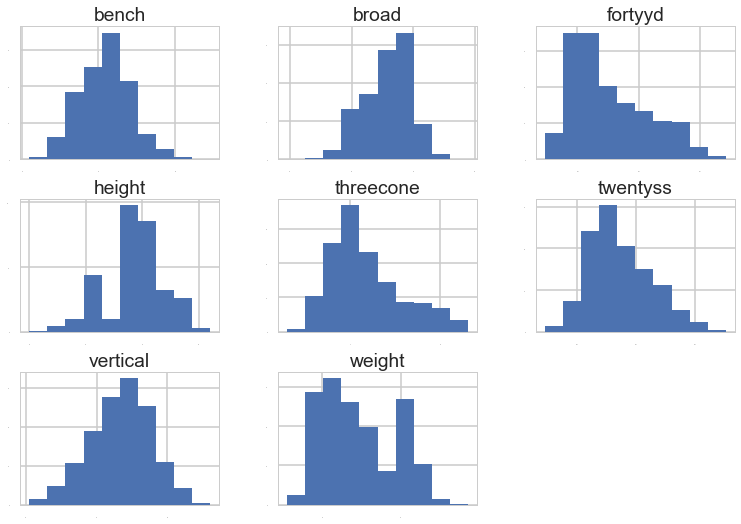

In [1539]:
# Looking at distributions for the player attributes. Looking for skewed data and may have to transform later.
attributes.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, layout=(3,3))

Will now use a density plot on the attributes, since this is what our eyes are trying to do when looking at a histogram.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000894D4400>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000090019EF0>]], dtype=object)

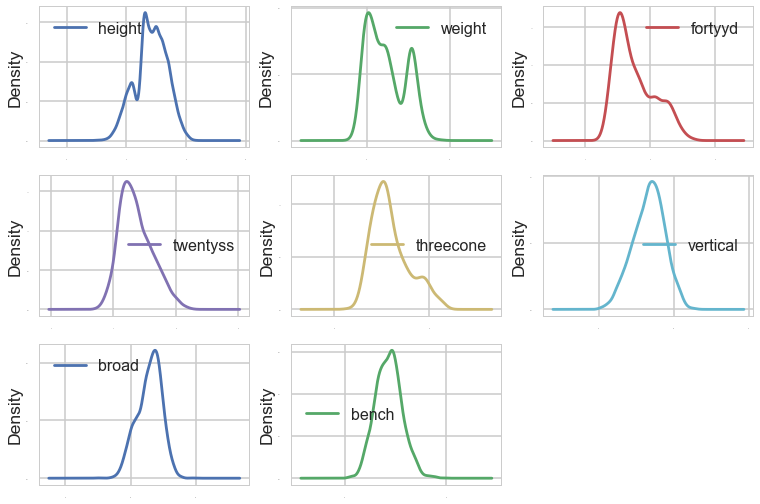

In [1540]:
# Will look at density plots, since this is more natural for our eyes.
attributes.plot(kind='density', subplots=True, layout=(3,3), sharex=False, fontsize=1)

Box and whisker plot of the attributes. Looking at spread of each attribute. Will probably have to rescale the attributes later.

height          AxesSubplot(0.125,0.657941;0.227941x0.222059)
weight       AxesSubplot(0.398529,0.657941;0.227941x0.222059)
fortyyd      AxesSubplot(0.672059,0.657941;0.227941x0.222059)
twentyss        AxesSubplot(0.125,0.391471;0.227941x0.222059)
threecone    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
vertical     AxesSubplot(0.672059,0.391471;0.227941x0.222059)
broad              AxesSubplot(0.125,0.125;0.227941x0.222059)
bench           AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

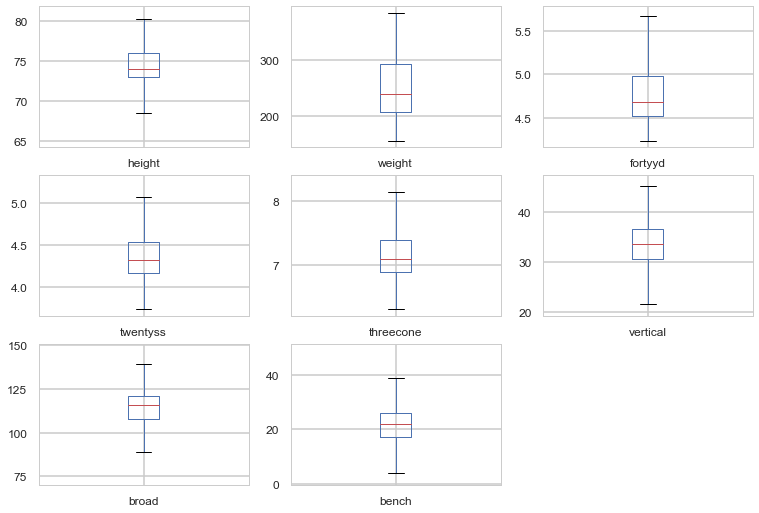

In [1541]:
# Box and whisker of attributes
attributes.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False,
fontsize=12)

Looking to see if player attributes are correlated and getting a peak to see if any attributes are correlated with picktotal. Used Spearman correlation, since we want to rank the players and that's pretty much what happens during the draft, with coaches and general managers ranking players.

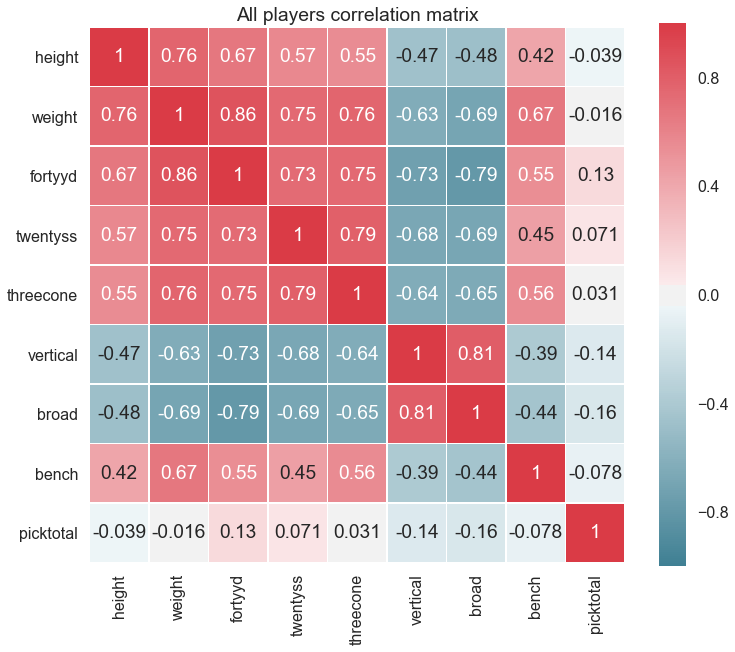

In [1542]:
# Correlation matrix of attributes and picktotal
f, ax = plt.subplots(figsize=(12, 10))
corr = newdf.corr(method='spearman')
sns.heatmap(corr, linewidths=0.5, annot=True, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title('All players correlation matrix')
plt.show()

After viewing the poor correlation results between the attribues and picktotal, it made me believe that we are comparing apples to oranges. Players that play positions are very different. The following is the mean and standard deviation of the players height, weight and drills per position.

In [1543]:
# Mean and standard deviation of every drill and picktotal for each position
newdfa = newdf[['position', 'height', 'weight', 'fortyyd', 'twentyss', 'threecone', 'vertical', 'broad', 'bench', 'picktotal']]
grouped = newdfa.groupby('position')
groupedagg = grouped.agg([np.mean, np.std])
groupedagg

height                weight              fortyyd            \
               mean       std        mean        std      mean       std   
position                                                                   
C         75.430233  1.068707  304.337209   7.725604  5.214545  0.146229   
CB        71.260977  1.557581  193.099150   8.654927  4.475277  0.085593   
DE        75.886519  1.394716  269.204778  13.729245  4.810318  0.135501   
DT        75.143411  1.462493  307.468992  14.421969  5.087592  0.157114   
ILB       73.664336  1.227296  242.097902   7.503346  4.720500  0.119087   
OG        76.090909  1.226533  314.656566  13.174473  5.272316  0.154943   
OLB       74.060606  1.388478  241.284091  10.229625  4.676680  0.119412   
OT        77.748148  1.211583  316.662963  14.412707  5.238258  0.176482   
QB        75.216374  1.646733  224.239766  11.282253  4.813841  0.187232   
RB        70.870427  1.930301  214.556911  14.039696  4.534191  0.112351   
S         72.748031  1.460784  208.358268   9.482749  4.546379  0.086841   
TE        76.448087  1.349108  254.704918   9.020144  4.749302  0.134066   
WR        72.784118  2.272771  201.014493  15.675887  4.485966  0.097519   

          twentyss           threecone             vertical            \
              mean       std      mean       std       mean       std   
position                                                                
C         4.599722  0.160211  7.740909  0.283741  28.760274  2.992014   
CB        4.136136  0.148414  6.898026  0.189399  36.416139  2.740946   
DE        4.405773  0.179117  7.233472  0.202423  33.478261  3.015588   
DT        4.605193  0.187384  7.642979  0.286098  29.476852  2.895373   
ILB       4.283960  0.142591  7.112632  0.180119  33.595041  2.839685   
OG        4.726039  0.199334  7.849048  0.247217  27.990683  2.996598   
OLB       4.265659  0.148516  7.130444  0.264601  34.927632  3.200052   
OT        4.723717  0.179167  7.762982  0.278715  28.592437  2.981282   
QB        4.301014  0.169147  7.115833  0.205626  31.769231  3.558252   
RB        4.229527  0.157770  7.005102  0.188482  35.037946  3.067205   
S         4.176743  0.138449  6.992424  0.237092  36.207763  2.799735   
TE        4.341942  0.162529  7.174286  0.188137  33.550633  3.098793   
WR        4.191086  0.146686  6.900968  0.183863  35.918182  3.008743   

               broad                bench             picktotal             
                mean       std       mean       std        mean        std  
position                                                                    
C         102.236111  5.524575  26.986842  5.679186  120.139535  65.483211  
CB        122.221154  5.509343  15.117241  4.169428  103.665722  64.999007  
DE        114.916667  6.249542  24.285714  4.938684  112.778157  74.694734  
DT        105.097087  5.551558  28.200000  5.884559  108.453488  70.745336  
ILB       113.725664  7.787636  23.056000  3.992541  118.916084  67.132882  
OG        101.374194  6.248271  26.250000  5.360812  128.449495  66.755976  
OLB       117.820961  6.245581  23.087719  4.872943  114.928030  68.087051  
OT        102.755459  5.837081  25.367965  4.857859  109.896296  75.413534  
QB        110.871429  6.879061  22.000000  2.549510  105.163743  79.374741  
RB        118.678049  5.653713  20.343434  4.607788  120.105691  70.337880  
S         120.809302  5.736089  17.189189  4.430486  123.917323  68.434189  
TE        115.302632  5.242515  21.543750  4.433785  130.234973  69.294835  
WR        120.936111  5.603802  15.056818  4.359182  118.594203  71.483617

The mean picktotal and innerquartiles very different for the positions

Create seperate data set for each position, since I believe the players in every position are significantly different

In [1711]:
cb = newdf[newdf.position == 'CB']
wr = newdf[newdf.position == 'WR']
c = newdf[newdf.position == 'C']
og = newdf[newdf.position == 'OG']
ot = newdf[newdf.position == 'OT']
qb = newdf[newdf.position == 'QB']
rb = newdf[newdf.position == 'RB']
te = newdf[newdf.position == 'TE']
dt = newdf[newdf.position == 'DT']
de = newdf[newdf.position == 'DE']
olb = newdf[newdf.position == 'OLB']
ilb = newdf[newdf.position == 'ILB']
s = newdf[newdf.position == 'S']

# Hypothesis Test

Will test to see that position mean weight difference is statistically significant. Chose positions cb and wr, since their mean weight only has a difference of 8 pounds. 

   position  picktotal_weight
7        OT        316.662963
5        OG        314.656566
3        DT        307.468992
0         C        304.337209
2        DE        269.204778
11       TE        254.704918
4       ILB        242.097902
6       OLB        241.284091
8        QB        224.239766
9        RB        214.556911
10        S        208.358268
12       WR        201.014493
1        CB        193.099150


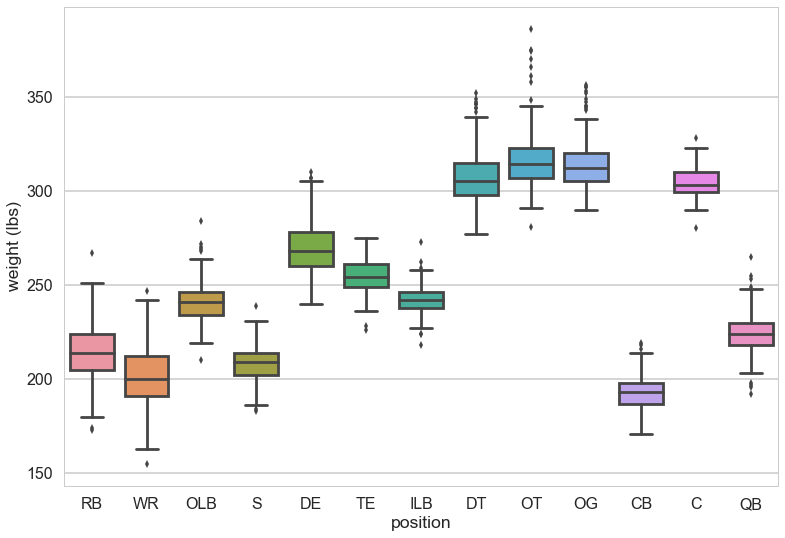

In [1545]:
# Mean weight per position
pos_wt_mu = newdf[['position','weight']].groupby(['position'])['weight']\
.mean().reset_index(name='picktotal_weight').sort_values(['picktotal_weight'],ascending=False) 
print(pos_wt_mu)

# checking position weight distribution
sns.boxplot(x='position', y='weight', data=newdf)
plt.xlabel('position')
plt.ylabel('weight (lbs)')
plt.show()

In [1546]:
cbwt= cb.weight
wrwt= wr.weight

def ecdf(x):
    xs = np.sort(x)
    ys = np.arange(1, len(xs)+1)/float(len(xs))
    return xs, ys

Compare CB and WR weight distribution, along with the mean and standard deviation. WR has a wider distribution than CBs, which can be seen on the ECDF chart and the standard deviation results.

The number of CB is 353, along with a mean of 193.099150142 and standard deviation of 8.64265883196
The number of WR is 414, along with a mean of 201.014492754 and standard deviation of 15.6569437177


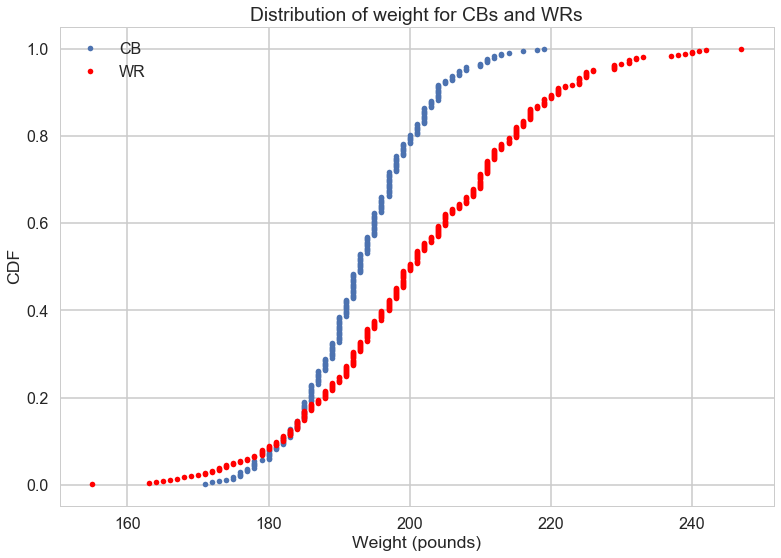

In [1547]:
xcb, ycb = ecdf(cbwt)
plt.plot(xcb, ycb, label="CB", marker=".", linestyle = 'none')
xwr, ywr = ecdf(wrwt)
plt.plot(xwr, ywr, label="WR", marker=".", linestyle = 'none', markerfacecolor='red')
plt.legend()
plt.xlabel('Weight (pounds)')
plt.ylabel('CDF')
plt.title('Distribution of weight for CBs and WRs')
CBcount= len(cbwt)
WRcount= len(wrwt)
mu_cb = np.mean(cbwt)
mu_wr = np.mean(wrwt)
sigma_cb = np.std(cbwt)
sigma_wr = np.std(wrwt)
print "The number of CB is {}, along with a mean of {} and standard deviation of {}".format(CBcount, mu_cb, sigma_cb)
print "The number of WR is {}, along with a mean of {} and standard deviation of {}".format(WRcount, mu_wr, sigma_wr)

Compare the 2 independent means.

H0: No difference between mu_wr and mu_cb, which is mu_wr - mu_cb = 0

Passes conditions of CLT with all observations being independent of one another and the number of observations is > 30 for both CB and WR.

Calculate point estimate and standard error in order to calculate the z-score. Decided to use z-score instead of t-score, since there are > 30 observations for both CB and WR

In [1548]:
# Point Estimate
PE = round(mu_wr - mu_cb,2)

# Standard Error
SE =np.sqrt(((sigma_cb*sigma_cb)/CBcount)+((sigma_wr*sigma_wr)/WRcount) )

# Z-score:
Z= PE/SE
print "Z-score: ",Z
print "P-value: ",st.norm.sf(abs(Z))

Z-score:  8.83427223945
P-value:  5.03760067486e-19


With a p-value of < 0.05, reject H0 (No difference between mu_cb and mu_wr, which is mu_cb - mu_wr = 0). Players weight and size is different and statistically significant.

Exploring picktotal mean per position to see if it looks different

# Picktotal Hypothesis Test

Will test to see that position mean picktotal difference is statistically significant. One round in the NFL draft consists of 32 picks. On average, CB's are being nearly drafted an entire round higher than TE's with a 29 mean picktotal difference.

   position  picktotal_mean
11       TE      130.234973
5        OG      128.449495
10        S      123.917323
0         C      120.139535
9        RB      120.105691
4       ILB      118.916084
12       WR      118.594203
6       OLB      114.928030
2        DE      112.778157
7        OT      109.896296
3        DT      108.453488
8        QB      105.163743
1        CB      103.665722


Text(0,0.5,u'picktotal')

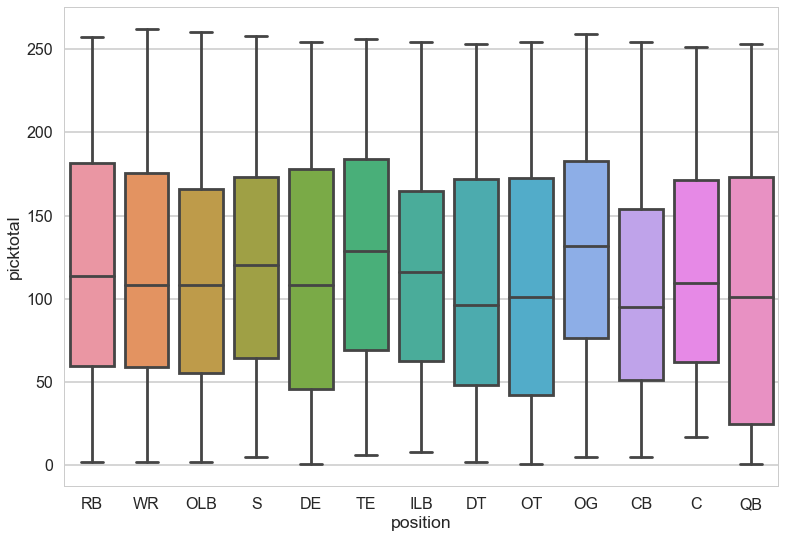

In [1549]:
# Mean picktotal per position
pos_pick_mu = newdf[['position','picktotal']].groupby(['position'])['picktotal']\
.mean().reset_index(name='picktotal_mean').sort_values(['picktotal_mean'],ascending=False) 
print(pos_pick_mu)

sns.boxplot(x='position', y='picktotal', data=newdf)
plt.xlabel('position')
plt.ylabel('picktotal')

CB's have a much wider picktotal distribution as seen by the standard deviation. ECDF visual doesn't do too good of job of showing the 2 positions different picktotal distributions.

The number of CB is 353, along with a mean of 103.66572238 and standard deviation of 64.906875004
The number of TE is 414, along with a mean of 201.014492754 and standard deviation of 15.6569437177


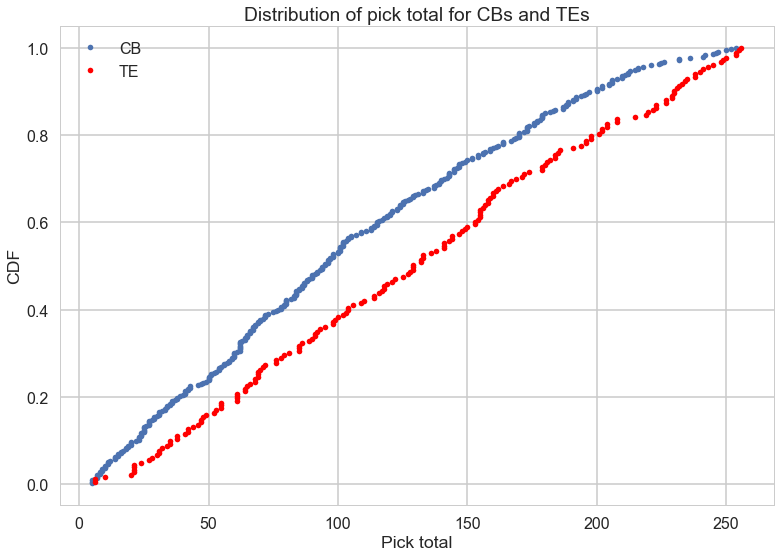

In [1550]:
# Picktotal distribution for positions cb and te
cbpick= cb.picktotal
tepick= te.picktotal
xcb, ycb = ecdf(cbpick)
plt.plot(xcb, ycb, label="CB", marker=".", linestyle = 'none')
xte, yte = ecdf(tepick)
plt.plot(xte, yte, label="TE", marker=".", linestyle = 'none', markerfacecolor='red')
plt.legend()
plt.xlabel('Pick total')
plt.ylabel('CDF')
plt.title('Distribution of pick total for CBs and TEs')
CBcount= len(cbpick)
TEcount= len(tepick)
mu_cb = np.mean(cbpick)
mu_te = np.mean(tepick)
sigma_cb = np.std(cbpick)
sigma_te = np.std(tepick)
print "The number of CB is {}, along with a mean of {} and standard deviation of {}".format(CBcount, mu_cb, sigma_cb)
print "The number of TE is {}, along with a mean of {} and standard deviation of {}".format(WRcount, mu_wr, sigma_wr)

Compare the 2 independent means.

H0: No difference between mu_te and mu_cb, which is mu_te - mu_cb = 0

Passes conditions of CLT with all observations being independent of one another and the number of observations is > 30 for both CB and TE.

Calculate point estimate and standard error in order to calculate the z-score. Decided to use z-score instead of t-score, since there are > 30 observations for both CB and WR

In [1551]:
# Point Estimate
PE = round(mu_te - mu_cb,2)

# Standard Error
SE =np.sqrt(((sigma_cb*sigma_cb)/CBcount)+((sigma_te*sigma_te)/TEcount) )

# Z-score:
Z= PE/SE
print "Z-score: ",Z
print "P-value: ",st.norm.sf(abs(Z))

Z-score:  4.30850083022
P-value:  8.21824298658e-06


With a p-value of < 0.05, reject H0 (No difference between mu_cb and mu_wr, which is mu_te - mu_cb = 0). Positional picktotal is different and statistically significant.

Since players appear to be significantly different, we will continue this study by analyzing the players by position

# Missing Values

How I handled missing values is that I removed players from the dataset that had greater than one missing value. After that, I used the mean of every positions attribute to fill in the rest of the missing values. This is one of many reasons why I decided to make a predictive model for every position since there attribute means were so very different as shown. Also, some positions rarely participated in particular drills, therefore removed that drill from the data set. For instance, only 5 qb's did the bench drill, therefore removed that drill from the qb data set. 

# Data Visualization and Predictive Modeling of every Position

##  Position: CB

In [1820]:
# Remove players with more than one missing value
cb1= cb.dropna(thresh=9)
# Fill in missing values with the mean of the column
cb= cb1.fillna(cb1.mean())
cb.head()

,position,height,weight,fortyyd,twentyss,threecone,vertical,broad,bench,picktotal
37,CB,72.0,196,4.51,4.07,7.05,40.0,121.0,17.000000,80.0
51,CB,73.0,203,4.48,4.27,6.77,36.0,124.0,14.944444,42.0
65,CB,71.0,193,4.38,4.14,6.94,41.5,129.0,12.000000,50.0
78,CB,69.0,196,4.56,4.15,7.22,35.5,113.0,17.000000,200.0
83,CB,70.0,182,4.50,4.26,7.20,33.5,115.0,9.000000,164.0


In [1821]:
cb.describe()

,height,weight,fortyyd,twentyss,threecone,vertical,broad,bench,picktotal
count,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,71.242291,192.678414,4.474141,4.141062,6.897703,36.392070,122.274336,14.944444,104.590308
std,1.516391,8.712600,0.084777,0.147545,0.108414,2.578936,5.315277,4.074165,63.778894
min,68.000000,171.000000,4.290000,3.750000,6.480000,29.500000,109.000000,2.000000,5.000000
25%,70.000000,187.000000,4.410000,4.055000,6.897703,34.500000,118.000000,12.000000,57.000000
50%,71.000000,192.000000,4.480000,4.141062,6.897703,36.000000,122.000000,15.000000,96.000000
75%,73.000000,198.000000,4.530000,4.250000,6.897703,38.000000,126.000000,17.000000,148.500000
max,76.000000,218.000000,4.700000,4.760000,7.290000,45.000000,137.000000,27.000000,254.000000


In [1822]:
# change dataset index to make checking for outliers easier later on..
cb.index = range(len(cb))
cb.head(3)

,position,height,weight,fortyyd,twentyss,threecone,vertical,broad,bench,picktotal
0,CB,72.0,196,4.51,4.07,7.05,40.0,121.0,17.000000,80.0
1,CB,73.0,203,4.48,4.27,6.77,36.0,124.0,14.944444,42.0
2,CB,71.0,193,4.38,4.14,6.94,41.5,129.0,12.000000,50.0


### Check for influential points and outliers

In [1683]:
# check r^2 of our data set using OLS prior to removing influential points
lm = smf.ols(formula = "picktotal ~ height + weight + fortyyd + twentyss + threecone + vertical + broad + bench", 
             data = cb).fit()
print lm.summary()

influence = lm.get_influence()
# For studentized residual, looking for values greater than 2 or less than -2
resid_student = influence.resid_studentized_external

# a point with leverage greater than (2k+2)/n should be carefully examined,
# where k is the number of predictors and n is the number of observations.
# For our example, (2*8+2/227)= 0.07930
leverage = influence.hat_matrix_diag

# Any points greater than 4/n or 4/227=.01762 should be considered 
(cooks, p) = influence.cooks_distance

# The conventional cut-off point for DFFITS is 2*sqrt(k/n)
(dffits, p) = influence.dffits

                            OLS Regression Results                            
Dep. Variable:              picktotal   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     11.16
Date:                Sun, 21 Jan 2018   Prob (F-statistic):           3.38e-13
Time:                        23:04:14   Log-Likelihood:                -1225.9
No. Observations:                 227   AIC:                             2470.
Df Residuals:                     218   BIC:                             2501.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   -346.4331    357.175     -0.970      0.3

In [1684]:
# Concatenate our original dataset, cb, with our four influential point statistics
cbres = pd.concat([pd.Series(cooks, name = "cooks"), pd.Series(dffits, name = "dffits"), 
                       pd.Series(leverage, name = "leverage"), pd.Series(resid_student, name = "resid_student")], axis = 1)
cbres = pd.concat([cb, cbres], axis = 1)
cbres.head() 

,position,height,weight,fortyyd,twentyss,threecone,vertical,broad,bench,picktotal,cooks,dffits,leverage,resid_student
0,CB,72.0,196,4.51,4.07,7.05,40.0,121.0,17.000000,80.0,0.000891,-0.089399,0.036883,-0.456835
1,CB,73.0,203,4.48,4.27,6.77,36.0,124.0,14.944444,42.0,0.002471,-0.149076,0.026565,-0.902411
2,CB,71.0,193,4.38,4.14,6.94,41.5,129.0,12.000000,50.0,0.000184,-0.040606,0.030839,-0.227635
3,CB,69.0,196,4.56,4.15,7.22,35.5,113.0,17.000000,200.0,0.006575,0.243101,0.076691,0.843507
4,CB,70.0,182,4.50,4.26,7.20,33.5,115.0,9.000000,164.0,0.000760,0.082532,0.061721,0.321791


Will use the DFFITS equation to determine which points are infuetial. Can read about the DFFITS and the equation here: https://en.wikipedia.org/wiki/DFFITS

Investigating those points with DFFITS greater than  2 * math.sqrt(float(len(attributes2.columns)) / len(cb))] 

In [1685]:
# Since DFITS seems to be the best overall measure of influence, will use this measure to determine which data points get removed
attributes2 = (attributes.drop(['position'],axis=1))
cbres[abs(cbres.dffits) >  2 * math.sqrt(float(len(attributes2.columns)) / len(cb))]

,position,height,weight,fortyyd,twentyss,threecone,vertical,broad,bench,picktotal,cooks,dffits,leverage,resid_student
23,CB,71.0,203,4.41,4.27,7.150000,32.5,117.0,17.000000,195.0,0.022465,0.452433,0.052315,1.925625
34,CB,68.0,184,4.55,4.40,7.260000,37.5,124.0,14.000000,41.0,0.047515,-0.658755,0.093216,-2.054621
37,CB,71.0,192,4.63,4.00,6.570000,34.0,117.0,14.944444,254.0,0.023095,0.457838,0.068549,1.687689
44,CB,74.0,185,4.61,4.27,6.970000,34.0,125.0,10.000000,43.0,0.022784,-0.454856,0.065423,-1.719157
50,CB,73.0,187,4.54,4.32,7.170000,36.0,126.0,4.000000,210.0,0.029015,0.513539,0.077050,1.777362
67,CB,70.0,187,4.54,4.03,6.590000,35.0,121.0,16.000000,246.0,0.023131,0.459522,0.048677,2.031470
121,CB,73.0,193,4.50,4.01,6.897703,38.0,127.0,23.000000,179.0,0.016555,0.388072,0.043129,1.827917
128,CB,69.0,171,4.40,4.26,6.897703,34.0,128.0,18.000000,212.0,0.038577,0.594198,0.069977,2.166210
156,CB,70.0,202,4.50,3.97,6.897703,40.0,127.0,17.000000,208.0,0.020730,0.435450,0.039964,2.134262
163,CB,71.0,192,4.39,4.08,6.897703,39.0,115.0,15.000000,215.0,0.025075,0.479387,0.043971,2.235315


r^2 increases by .042, yay!

In [1686]:
# Remove these data points from our dataset
newcb= cb.drop(cb.index[[23,34,37,44,50,67, 121, 128,156,163,224]])
cb=newcb

# Check for an increase in r^2 
lm_1 = smf.ols(formula = "picktotal ~ height + weight + fortyyd + twentyss + threecone + vertical + broad + bench", 
               data = cb).fit()
print lm_1.summary()

                            OLS Regression Results                            
Dep. Variable:              picktotal   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     12.93
Date:                Sun, 21 Jan 2018   Prob (F-statistic):           4.69e-15
Time:                        23:04:31   Log-Likelihood:                -1148.4
No. Observations:                 216   AIC:                             2315.
Df Residuals:                     207   BIC:                             2345.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   -672.0065    348.070     -1.931      0.0

Check attribute distribution using various plots

In [1823]:
cbattributes = (cb.drop(['picktotal'],axis=1))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000C23E9748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000C6D3EB38>]], dtype=object)

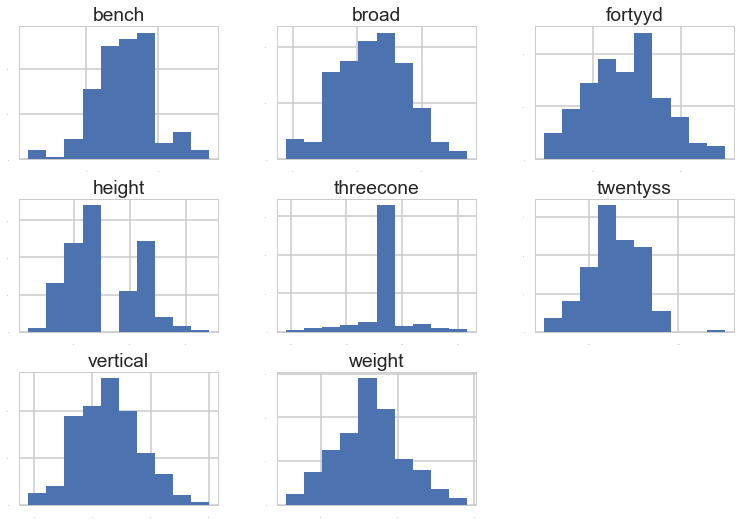

In [1824]:
cbattributes.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, layout=(3,3))

Height appears bimodal which will have to be transformed

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000C779BEF0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000C79EEA20>]], dtype=object)

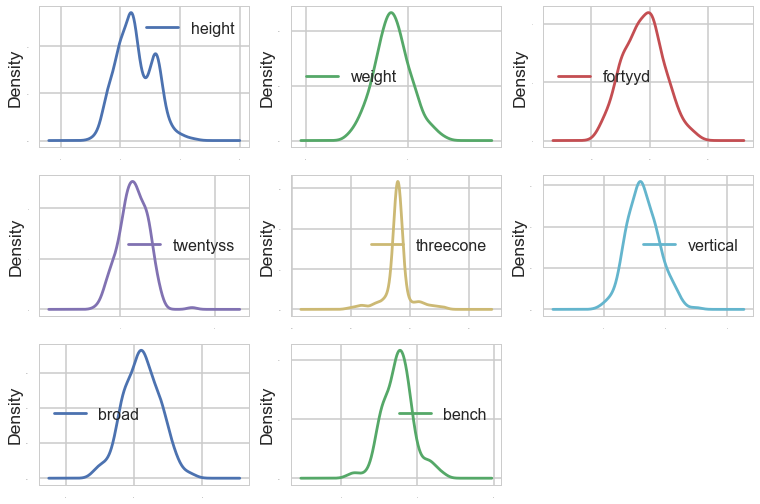

In [1825]:
cbattributes.plot(kind='density', subplots=True, layout=(3,3), sharex=False, fontsize=1)

Three cone had a ton of missing values so not surprised there is almost no spread, since we filled in the missing values with mean. Most of the attributes are on different scales, so will have to do a rescale transformation later.

height          AxesSubplot(0.125,0.657941;0.227941x0.222059)
weight       AxesSubplot(0.398529,0.657941;0.227941x0.222059)
fortyyd      AxesSubplot(0.672059,0.657941;0.227941x0.222059)
twentyss        AxesSubplot(0.125,0.391471;0.227941x0.222059)
threecone    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
vertical     AxesSubplot(0.672059,0.391471;0.227941x0.222059)
broad              AxesSubplot(0.125,0.125;0.227941x0.222059)
bench           AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

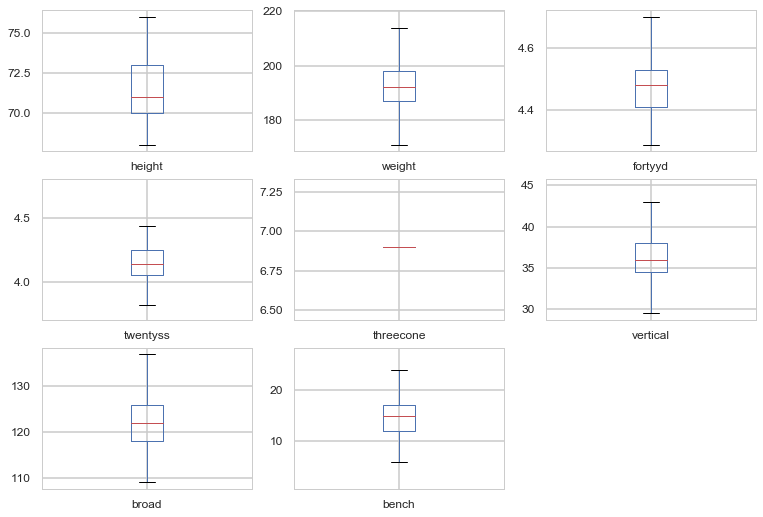

In [1826]:
cbattributes.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False,
fontsize=12)

With the scatter matrix, you can now see all those missing values that we filled in with the mean for the threecone. Broad and vertical appear to have a positive correlation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000C7EB25C0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000CAFB85F8>]], dtype=object)

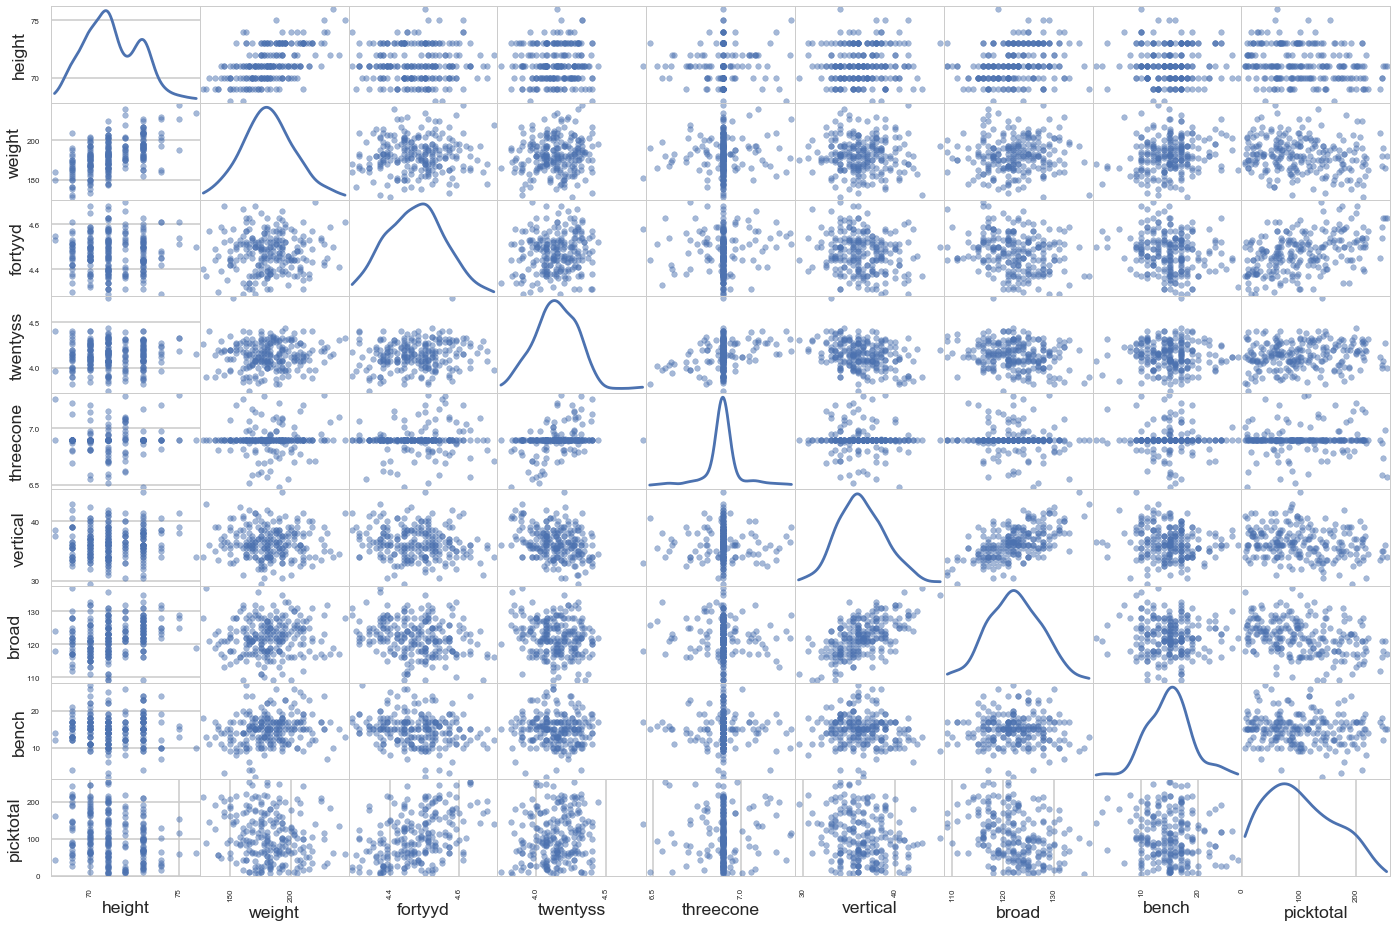

In [1827]:
scatter_matrix(cb, alpha=0.5, figsize=(24, 16), diagonal='kde')

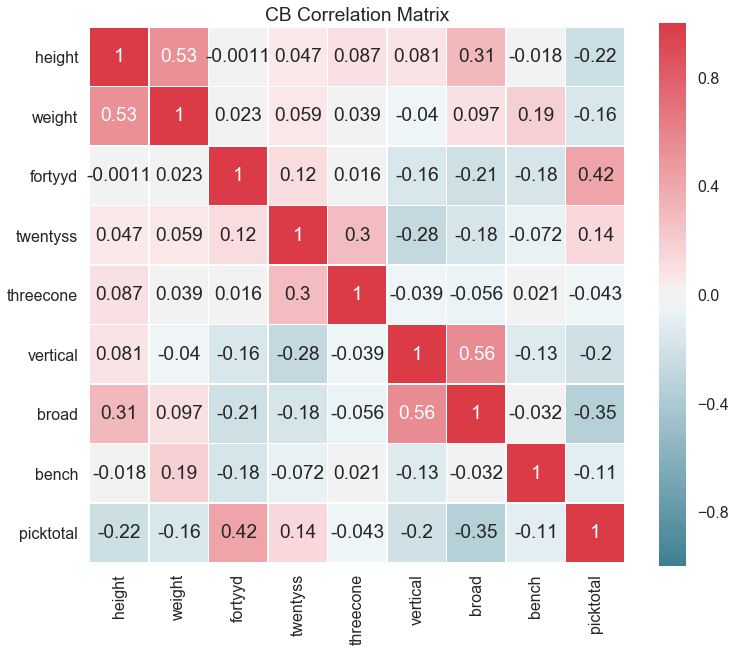

In [1828]:
# Correlation Matrix
f, ax = plt.subplots(figsize=(12, 10))
corr = cb.corr(method='spearman')
sns.heatmap(corr, linewidths=0.5, annot=True, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title('CB Correlation Matrix')
plt.show()

Text(0.5,1,u'Spearman Correlation: 0.423955')

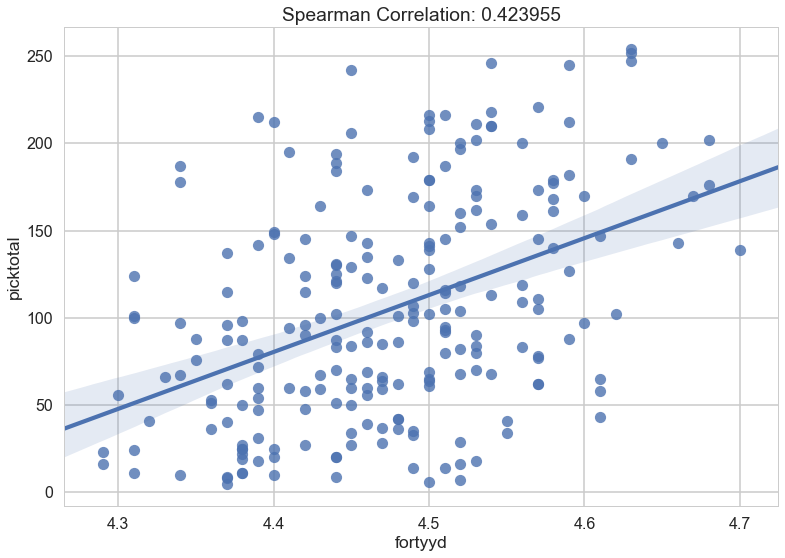

In [1829]:
# Slight correlation between picktotal and forty yard dash. 
rs = cb['fortyyd'].corr(cb['picktotal'],method='spearman')
sns.regplot(y="picktotal", x="fortyyd", data=cb, fit_reg = True)
plt.title("Spearman Correlation: %f" % (rs))

### Test different regression algorithms

In [1830]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('RIDGE', Ridge()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [1831]:
array = cb.values
X = array[:,1:9]
Y = array[:,9]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

ScaledLR: -3301.561287 (349.333967)
ScaledLASSO: -3287.622572 (299.551531)
ScaledRIDGE: -3298.353650 (347.061906)
ScaledEN: -3289.712674 (216.930034)
ScaledKNN: -3701.874180 (534.124287)
ScaledCART: -6615.166366 (637.267072)
ScaledSVR: -4376.758139 (544.714424)


[Text(1,0,u'ScaledLR'),
 Text(2,0,u'ScaledLASSO'),
 Text(3,0,u'ScaledRIDGE'),
 Text(4,0,u'ScaledEN')]

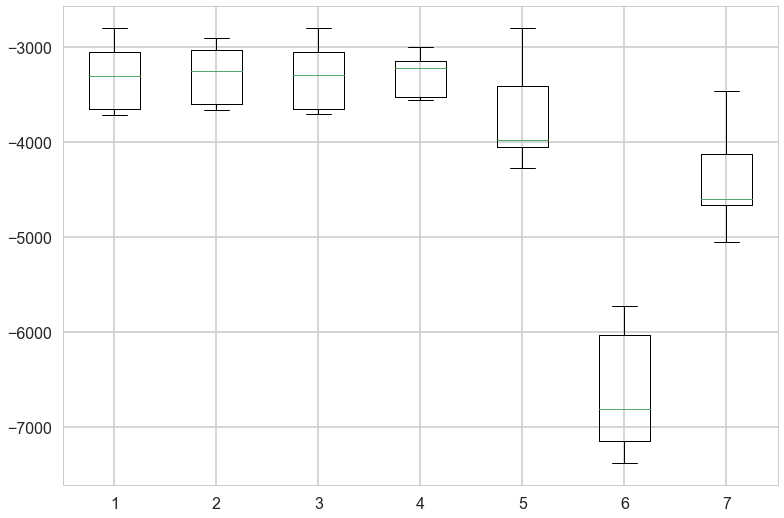

In [1832]:
# Test options and evaluation metric
num_folds = 5
seed = 3
scoring = 'neg_mean_squared_error'

# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',Lasso())])))
pipelines.append(('ScaledRIDGE', Pipeline([('Scaler', StandardScaler()),('RIDGE',Ridge())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR',SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Compare Algorithms
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

In [1833]:
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}
model = ElasticNet()# Grid Search for Elastic net Tuning

grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X, Y)
print("Tuned ElasticNet l1 ratio: {}".format(grid.best_params_))

Tuned ElasticNet l1 ratio: {'l1_ratio': 1.0}


In [1834]:
# Grid Search for lasso Tuning to find the best alpha
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.205140919322
0.1


In [1835]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -3383.555858 (184.758367)
ScaledGBM: -3626.060775 (419.421565)
ScaledRF: -3726.473065 (101.812887)
ScaledET: -3939.045638 (618.769438)


Looks like Lasso is the winner..

In [1836]:
# prepare the Lasso model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = Lasso(random_state=seed, alpha = 0.1)
model.fit(rescaledX, Y_train)

# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
mse_score_model = mean_squared_error(Y_validation, predictions)
r2_score_model = r2_score(Y_validation, predictions)
print("Lasso MSE on test data : %f" % mse_score_model)
print("Lasso r^2 on test data : %f" % r2_score_model)

Lasso MSE on test data : 2642.685313
Lasso r^2 on test data : 0.097289


In [1837]:
# prepare the elasticnet model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model1 = ElasticNet(random_state=seed, l1_ratio = 1.0)
model1.fit(rescaledX, Y_train)

# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model1.predict(rescaledValidationX)
mse_score_model1 = mean_squared_error(Y_validation, predictions)
r2_score_model1 = r2_score(Y_validation, predictions)
print("ElasticNet MSE on test data : %f" % mse_score_model1)
print("ElasticNet r^2 on test data : %f" % r2_score_model1)

ElasticNet MSE on test data : 2579.325499
ElasticNet r^2 on test data : 0.118932


Text(0.5,0,u'Coefficients')

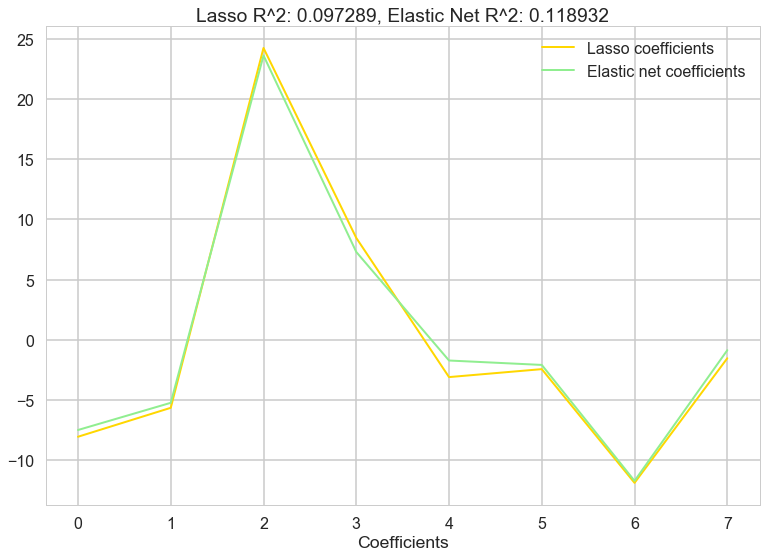

In [1838]:
plt.plot(model.coef_, color='gold', linewidth=2,
         label='Lasso coefficients')
plt.plot(model1.coef_, color='lightgreen', linewidth=2,
         label='Elastic net coefficients')
plt.legend(loc='best')
plt.title("Lasso R^2: %f, Elastic Net R^2: %f"
          % (r2_score_model, r2_score_model1))
plt.xlabel("Coefficients")

fortyyd coefficient carries the most weight out of all eight coefficients

In [1624]:
# Matching lasso coefficient values to the column labels
cblabels = (cb.drop(['position','picktotal'],axis=1))
pd.DataFrame({'features': cblabels.columns, 'estimatedCoefficients': model.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,height,-5.970691
1,weight,-6.903646
2,fortyyd,23.922206
3,twentyss,4.261460
4,threecone,0.137964
5,vertical,1.558277
6,broad,-14.182610
7,bench,-3.123019


In [1625]:
# Model intercept and the number of coefficients
print('Estimated intercept coefficient: {}'.format(model.intercept_))
print('Number of coefficients: {}'.format(len(model.coef_)))

Estimated intercept coefficient: 100.819767442
Number of coefficients: 8


Model not even close at predicting the round a player gets drafted. 256 is the highest picktotal a player can get drafted and the model is extremely off.

In [1626]:
# Make 5 predictions with the model and, well, just bad
model.predict(X)[0:5]

array([-3262.835, -3359.396, -3334.488, -3136.913, -3053.7  ])

Text(0,0.5,u'Frequency')

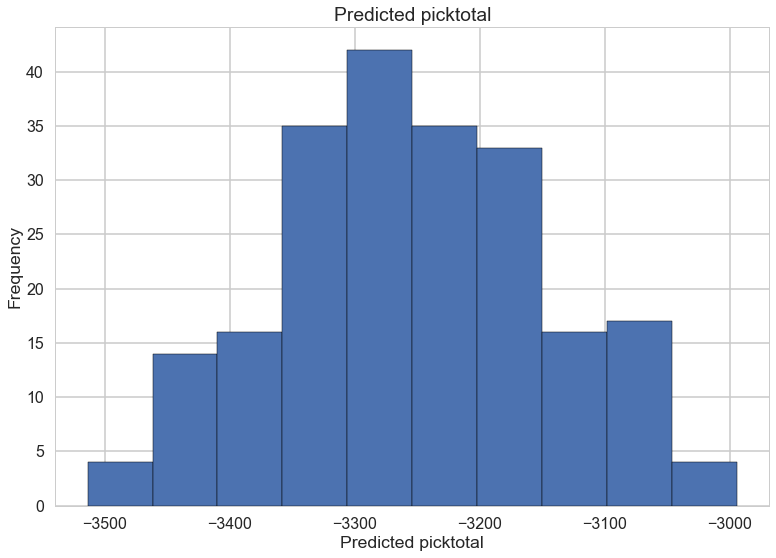

In [1627]:
predicted = model.predict(X)
plt.hist(predicted, edgecolor='black')
plt.title("Predicted picktotal")
plt.xlabel("Predicted picktotal")
plt.ylabel("Frequency")

## Position: WR

In [1712]:
# Remove players with more than one missing value
wr1= wr.dropna(thresh=9)
# Fill in missing values with the mean of the column
wr = wr1.fillna(wr1.mean())
wr.head()

,position,height,weight,fortyyd,twentyss,threecone,vertical,broad,bench,picktotal
4,WR,68.0,180,4.43,4.07,6.64,34.0,121.0,13.0,238.0
17,WR,73.0,197,4.42,4.15,6.66,41.5,129.0,7.0,162.0
28,WR,72.0,205,4.54,4.11,7.04,37.0,120.0,17.0,233.0
43,WR,70.0,195,4.51,4.26,6.97,33.0,113.0,10.0,184.0
46,WR,73.0,212,4.43,4.06,6.98,41.0,131.0,23.0,87.0


In [1713]:
wr.describe()

,height,weight,fortyyd,twentyss,threecone,vertical,broad,bench,picktotal
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,72.865764,203.241379,4.475347,4.208806,6.898287,36.051724,121.437811,14.708333,114.689655
std,2.303239,15.356034,0.091490,0.141773,0.173562,2.821599,5.410602,3.752062,69.691450
min,65.000000,163.000000,4.280000,3.810000,6.300000,26.000000,105.000000,4.000000,3.000000
25%,71.000000,192.500000,4.410000,4.110000,6.785000,34.000000,118.000000,13.000000,58.000000
50%,73.000000,203.000000,4.480000,4.210000,6.898287,36.000000,121.000000,14.708333,106.000000
75%,74.000000,215.000000,4.540000,4.305000,7.015000,38.000000,125.000000,16.000000,173.000000
max,78.000000,241.000000,4.720000,4.600000,7.390000,45.000000,139.000000,27.000000,253.000000


In [1714]:
# change dataset index to make checking for outliers easier later on..
wr.index = range(len(wr))
wr.head(3)

,position,height,weight,fortyyd,twentyss,threecone,vertical,broad,bench,picktotal
0,WR,68.0,180,4.43,4.07,6.64,34.0,121.0,13.0,238.0
1,WR,73.0,197,4.42,4.15,6.66,41.5,129.0,7.0,162.0
2,WR,72.0,205,4.54,4.11,7.04,37.0,120.0,17.0,233.0


## Check for infuential points

In [1715]:
# check r^2 of our data set using OLS prior to removing influential points
lm = smf.ols(formula = "picktotal ~ height + weight + fortyyd + twentyss + threecone + vertical + broad + bench", 
             data = wr).fit()
print lm.summary()

influence = lm.get_influence()
# For studentized residual, looking for values greater than 2 or less than -2
resid_student = influence.resid_studentized_external

# a point with leverage greater than (2k+2)/n should be carefully examined,
# where k is the number of predictors and n is the number of observations.
# For our example, (2*8+2/227)= 0.07930
leverage = influence.hat_matrix_diag

# Any points greater than 4/n or 4/227=.01762 should be considered 
(cooks, p) = influence.cooks_distance

# The conventional cut-off point for DFFITS is 2*sqrt(k/n)
(dffits, p) = influence.dffits

                            OLS Regression Results                            
Dep. Variable:              picktotal   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     1.892
Date:                Sun, 21 Jan 2018   Prob (F-statistic):             0.0632
Time:                        23:16:24   Log-Likelihood:                -1141.5
No. Observations:                 203   AIC:                             2301.
Df Residuals:                     194   BIC:                             2331.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   -321.2446    406.328     -0.791      0.4

In [1716]:
# Concatenate our original dataset, wr, with our four influential point statistics
wrres = pd.concat([pd.Series(cooks, name = "cooks"), pd.Series(dffits, name = "dffits"), 
                       pd.Series(leverage, name = "leverage"), pd.Series(resid_student, name = "resid_student")], axis = 1)
wrres = pd.concat([wr, wrres], axis = 1)
wrres 

,position,height,weight,fortyyd,twentyss,threecone,vertical,broad,bench,picktotal,cooks,dffits,leverage,resid_student
0,WR,68.000,180,4.430000,4.07,6.640000,34.0,121.000000,13.000000,238.0,1.712825e-02,0.395079,0.043489,1.852853
1,WR,73.000,197,4.420000,4.15,6.660000,41.5,129.000000,7.000000,162.0,4.859740e-03,0.208951,0.062169,0.811560
2,WR,72.000,205,4.540000,4.11,7.040000,37.0,120.000000,17.000000,233.0,5.755375e-03,0.228477,0.020363,1.584745
3,WR,70.000,195,4.510000,4.26,6.970000,33.0,113.000000,10.000000,184.0,1.550135e-03,0.117944,0.030883,0.660695
4,WR,73.000,212,4.430000,4.06,6.980000,41.0,131.000000,23.000000,87.0,1.151346e-06,0.003211,0.049735,0.014034
5,WR,74.000,213,4.350000,4.30,7.060000,45.0,139.000000,18.000000,76.0,8.883149e-05,0.028203,0.079032,0.096275
6,WR,73.000,211,4.420000,3.98,6.710000,33.0,120.000000,14.708333,4.0,1.106274e-02,-0.316587,0.041908,-1.513723
7,WR,68.000,185,4.560000,4.32,7.170000,37.0,115.000000,10.000000,105.0,3.740707e-03,-0.183234,0.066432,-0.686896
8,WR,74.000,216,4.475347,4.18,6.860000,36.5,124.000000,23.000000,186.0,6.070199e-03,0.234199,0.030029,1.331050
9,WR,72.000,195,4.460000,4.32,7.030000,35.0,115.000000,14.708333,146.0,2.523561e-04,0.047547,0.021986,0.317115


In [1717]:
# Since DFITS seems to be the best overall measure of influence, will use this measure to determine which data points get removed
wrattributes = (wr.drop(['picktotal'],axis=1))
wrres[abs(wrres.dffits) >  2 * math.sqrt(float(len(wrattributes.columns)) / len(wr))]

,position,height,weight,fortyyd,twentyss,threecone,vertical,broad,bench,picktotal,cooks,dffits,leverage,resid_student
25,WR,71.00,198,4.43,3.94,6.690000,38.5,122.0,7.000000,12.0,0.019879,-0.424846,0.062358,-1.647416
35,WR,75.00,219,4.42,3.98,6.640000,37.5,123.0,20.000000,236.0,0.023207,0.461275,0.043924,2.152056
40,WR,70.00,163,4.46,4.18,6.630000,41.0,132.0,14.708333,240.0,0.050294,0.678330,0.098537,2.051700
44,WR,68.00,174,4.34,4.01,6.898287,32.0,120.0,14.000000,8.0,0.020009,-0.425732,0.074314,-1.502568
60,WR,75.00,194,4.51,4.33,6.650000,34.5,122.0,7.000000,236.0,0.023001,0.457079,0.069533,1.672039
69,WR,73.00,225,4.53,3.98,6.590000,35.0,124.0,21.000000,238.0,0.033692,0.555326,0.066932,2.073419
84,WR,70.25,196,4.61,4.18,6.930000,38.5,121.0,4.000000,20.0,0.038706,-0.594968,0.078842,-2.033680
114,WR,65.00,166,4.34,4.48,6.540000,42.0,116.0,10.000000,197.0,0.039952,0.600706,0.175890,1.300271
139,WR,76.00,218,4.43,4.33,7.040000,32.0,116.0,9.000000,243.0,0.021219,0.439874,0.051565,1.886487
143,WR,73.00,184,4.31,4.11,6.620000,41.5,129.0,7.000000,253.0,0.052232,0.694084,0.076527,2.411108


Increased our r^2 by 6.8%, after removing infuential points

In [1718]:
# Remove these data points from our dataset
newwr= wr.drop(wr.index[[25,35,40,44,60,69,84,114,139,143,192]])
wr=newwr

# Check for an increase in r^2 
lm_1 = smf.ols(formula = "picktotal ~ height + weight + fortyyd + twentyss + threecone + vertical + broad + bench", 
               data = wr).fit()
print lm_1.summary()

                            OLS Regression Results                            
Dep. Variable:              picktotal   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     3.737
Date:                Sun, 21 Jan 2018   Prob (F-statistic):           0.000448
Time:                        23:16:48   Log-Likelihood:                -1063.0
No. Observations:                 192   AIC:                             2144.
Df Residuals:                     183   BIC:                             2173.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   -466.3839    394.911     -1.181      0.2

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000AEF98080>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000B1E31A58>]], dtype=object)

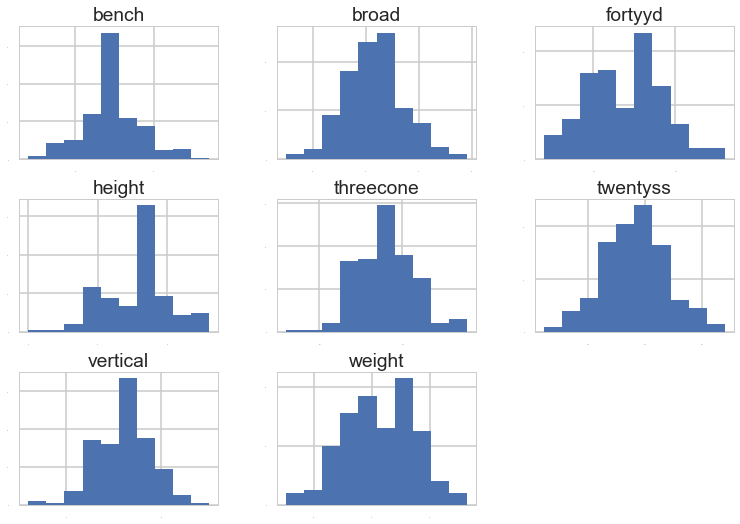

In [1719]:
wrattributes.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, layout=(3,3))

Height, weight and forty appear bimodel

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000B22FC748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000BB1650B8>]], dtype=object)

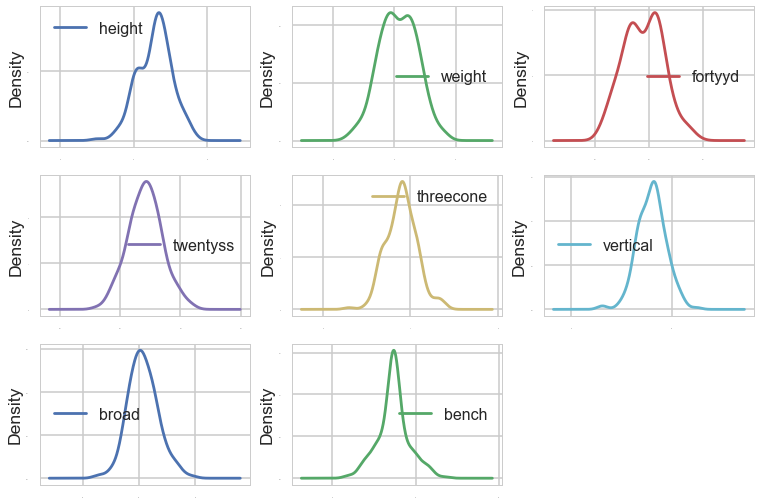

In [1720]:
wrattributes.plot(kind='density', subplots=True, layout=(3,3), sharex=False, fontsize=1)

Compared to CB's, more WR's ran the threecone drill, so got a better reading and spread of distribution

height          AxesSubplot(0.125,0.657941;0.227941x0.222059)
weight       AxesSubplot(0.398529,0.657941;0.227941x0.222059)
fortyyd      AxesSubplot(0.672059,0.657941;0.227941x0.222059)
twentyss        AxesSubplot(0.125,0.391471;0.227941x0.222059)
threecone    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
vertical     AxesSubplot(0.672059,0.391471;0.227941x0.222059)
broad              AxesSubplot(0.125,0.125;0.227941x0.222059)
bench           AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

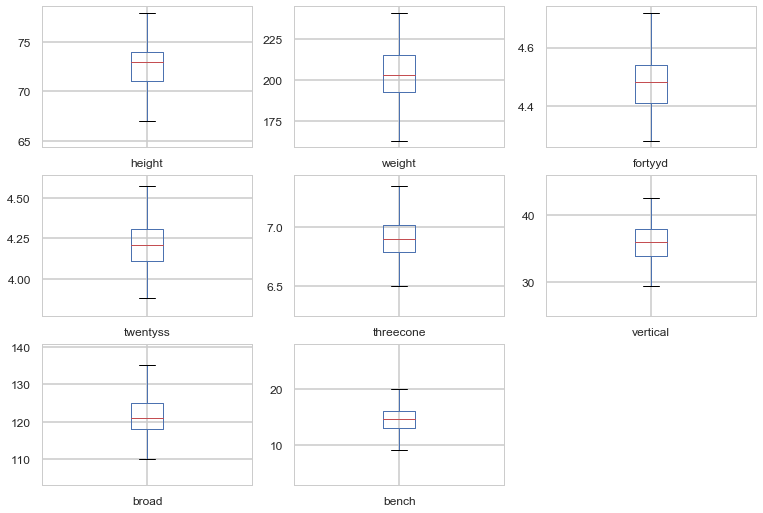

In [1721]:
wrattributes.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False,
fontsize=12)

Still, a lot of missing values in threecone as we can see them all lined up on the mean

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000AF0AF748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000BF99B390>]], dtype=object)

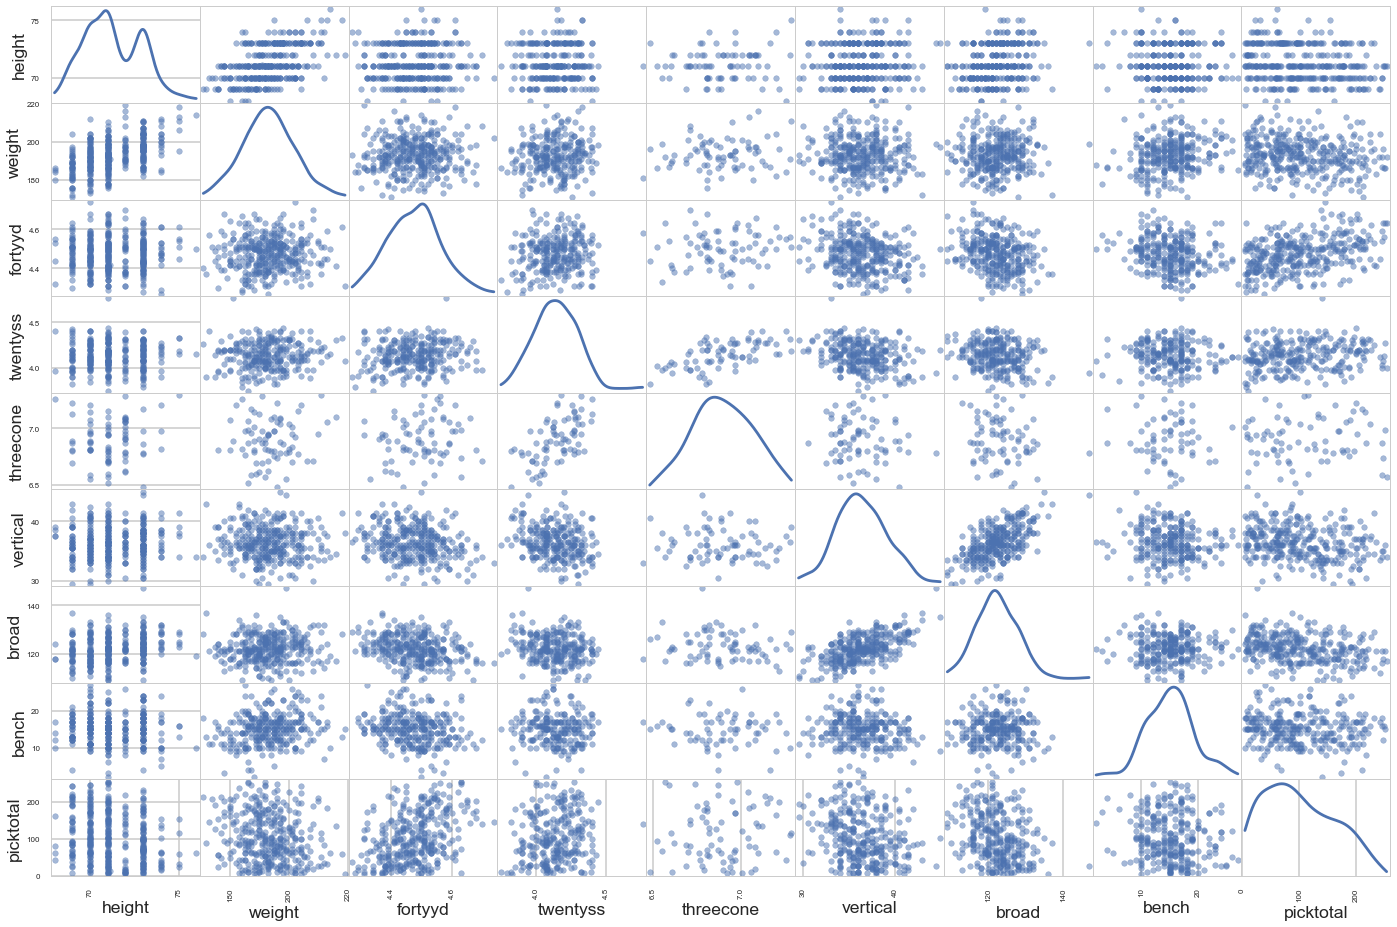

In [1722]:
scatter_matrix(cb, alpha=0.5, figsize=(24, 16), diagonal='kde')

Height and weight the only attributes correlated. Picktotal no correlation with any attributes

Text(0.5,1,u'WR Correlation between different attributes and pick total')

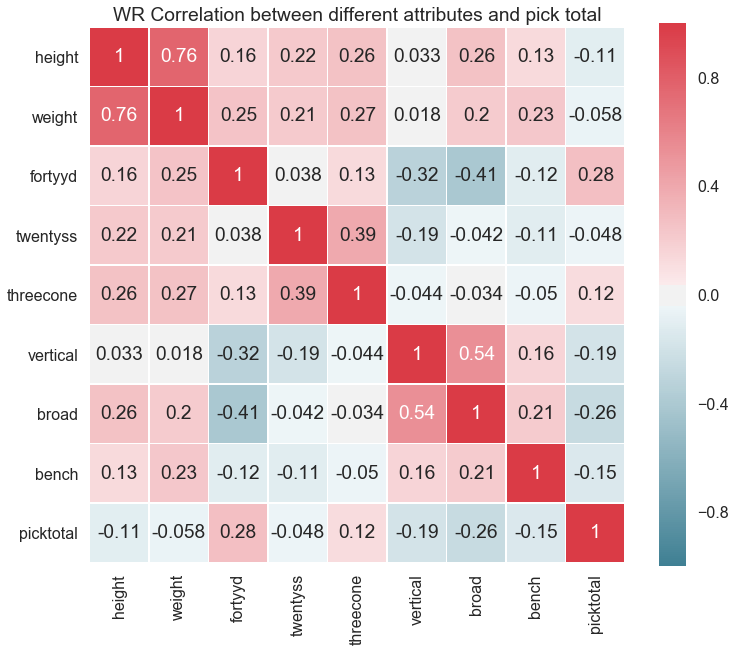

In [1723]:
f, ax = plt.subplots(figsize=(12, 10))
corr = wr.corr(method='spearman')
sns.heatmap(corr, linewidths=0.5, annot=True, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title('WR Correlation between different attributes and pick total')

### Try different regression algorithms

In [1724]:
array = wr.values
X = array[:,1:9]
Y = array[:,9]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

ScaledLR: -4702.531640 (635.003237)
ScaledLASSO: -4516.522447 (524.533130)
ScaledRIDGE: -4680.807257 (614.926546)
ScaledEN: -4335.937381 (539.003545)
ScaledKNN: -5473.286452 (1093.470044)
ScaledCART: -9367.561505 (895.219187)
ScaledSVR: -4760.681899 (811.416382)


[Text(0,0,u'ScaledLR'),
 Text(0,0,u'ScaledLASSO'),
 Text(0,0,u'ScaledRIDGE'),
 Text(0,0,u'ScaledEN'),
 Text(0,0,u'ScaledKNN'),
 Text(0,0,u'ScaledCART'),
 Text(0,0,u'ScaledSVR')]

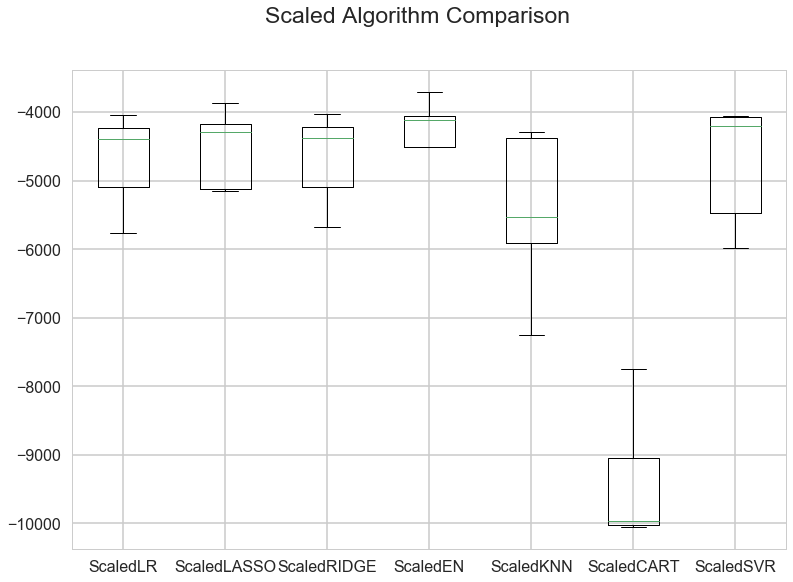

In [1725]:
# Test options and evaluation metric
num_folds = 5
seed = 3
scoring = 'neg_mean_squared_error'

# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',Lasso())])))
pipelines.append(('ScaledRIDGE', Pipeline([('Scaler', StandardScaler()),('RIDGE',Ridge())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR',SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)

In [1726]:
# Gridsearch for Elastic net tuning
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}
model = ElasticNet()# Grid Search for Elastic net Tuning

grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X, Y)
print("Tuned ElasticNet l1 ratio: {}".format(grid.best_params_))

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}


In [1727]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -4907.845540 (363.672920)
ScaledGBM: -5794.549168 (653.428473)
ScaledRF: -5973.870344 (773.150995)
ScaledET: -5383.194011 (972.840871)


Just god aweful results. WR combine numbers have no predictive powers for picktotal

In [1728]:
# prepare the elasticnet model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model1 = ElasticNet(random_state=seed, l1_ratio = 1)
model1.fit(rescaledX, Y_train)

# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model1.predict(rescaledValidationX)
mse_score_model1 = mean_squared_error(Y_validation, predictions)
r2_score_model1 = r2_score(Y_validation, predictions)
print("ElasticNet MSE on test data : %f" % mse_score_model1)
print("ElasticNet r^2 on test data : %f" % r2_score_model1)

ElasticNet MSE on test data : 3794.176492
ElasticNet r^2 on test data : -0.076686


Forty yard dash carries the most weight

In [1729]:
# Matching coefficient values to the column labels
wrlabels = (wr.drop(['position','picktotal'],axis=1))
pd.DataFrame({'features': wrlabels.columns, 'estimatedCoefficients': model1.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,height,-3.722376
1,weight,-9.849209
2,fortyyd,16.903231
3,twentyss,-0.848136
4,threecone,8.690016
5,vertical,-2.324810
6,broad,-4.446575
7,bench,-4.543225


In [1730]:
# Model intercept and the number of coefficients
print('Estimated intercept coefficient: {}'.format(model1.intercept_))
print('Number of coefficients: {}'.format(len(model1.coef_)))

Estimated intercept coefficient: 113.908496732
Number of coefficients: 8


With such a terrible r^2 and MSE, I am not going to even try making predictions with this model

# Pump the brakes on this regression project!

Let's face it, our regression models for positions CB and WR have aweful MSE and r^2 scores, so instead of continuing on with more terrible models for the next 11 positions, let's change things.

I also probably had a little bias by thinking we had to create 11 seperate models due to the positions having different means for the attributes. I'm also a football fan and know that guys playing the positions are much different as in size, speed, etc.

What if I wasn't a football fan? I would have no idea what column position means. As a data scientist, all I would know is that the position column is a categorical variable and to use it appropriately by turning it into dummy variables.

If you remember, after we eliminated players from the dataset that were NOT drafted, we ended up with 3133 rows (players). We then split up those 3133 players into the 13 different positions and tried to predict what their picktotal would be which could range from 1-256. With the little data that we have, trying to make a prediction of a value between 1-256 just seams way to granular. We are drilling to deep. It's time to bring the drill up some and make this less granular. 

So, we will now reintroduce the players that were not drafted back into our dataset, which will give us our original player count of 4822 players. We will also make this study less granular by just simply predicting if a player will be drafted yes or no. We will now continue this project as a classification project.

Below, is just a reminder of what our dataset looked like prior to dropping undrafted players. In the picktotal column you will notice some null's and those are players that weren't drafted and will be doing some data preprocessing later, so our algorithms run.

In [1741]:
newdf2.head(10)

,position,height,weight,fortyyd,twentyss,threecone,vertical,broad,bench,picktotal
0,RB,69.0,205,4.60,3.95,6.79,42.5,130.0,24.0,54.0
1,WR,72.0,198,4.42,NaN,NaN,NaN,NaN,12.0,20.0
2,RB,72.0,221,4.57,4.10,7.10,39.0,121.0,19.0,149.0
3,OLB,73.0,227,4.55,4.20,7.14,36.0,121.0,24.0,124.0
4,WR,68.0,180,4.43,4.07,6.64,34.0,121.0,13.0,238.0
5,RB,72.0,221,4.53,4.28,6.96,35.5,121.0,11.0,125.0
6,S,72.0,218,4.56,4.03,7.09,35.5,122.0,NaN,142.0
7,WR,73.0,187,NaN,NaN,NaN,NaN,NaN,13.0,NaN
8,DE,78.0,294,5.03,4.19,7.20,30.0,111.0,NaN,93.0
9,TE,77.0,244,NaN,NaN,NaN,NaN,NaN,NaN,254.0


In [1742]:
newdf2.shape

(4822, 10)

## Data Preprocessing

Turn our categorical variable, position, into dummy variables

In [1743]:
# Create dummy variables
newdf_dummy = pd.get_dummies(newdf2)
newdf_dummy.head(10)

,height,weight,fortyyd,twentyss,threecone,vertical,broad,bench,picktotal,position_C,...,position_DT,position_ILB,position_OG,position_OLB,position_OT,position_QB,position_RB,position_S,position_TE,position_WR
0,69.0,205,4.60,3.95,6.79,42.5,130.0,24.0,54.0,0,...,0,0,0,0,0,0,1,0,0,0
1,72.0,198,4.42,NaN,NaN,NaN,NaN,12.0,20.0,0,...,0,0,0,0,0,0,0,0,0,1
2,72.0,221,4.57,4.10,7.10,39.0,121.0,19.0,149.0,0,...,0,0,0,0,0,0,1,0,0,0
3,73.0,227,4.55,4.20,7.14,36.0,121.0,24.0,124.0,0,...,0,0,0,1,0,0,0,0,0,0
4,68.0,180,4.43,4.07,6.64,34.0,121.0,13.0,238.0,0,...,0,0,0,0,0,0,0,0,0,1
5,72.0,221,4.53,4.28,6.96,35.5,121.0,11.0,125.0,0,...,0,0,0,0,0,0,1,0,0,0
6,72.0,218,4.56,4.03,7.09,35.5,122.0,NaN,142.0,0,...,0,0,0,0,0,0,0,1,0,0
7,73.0,187,NaN,NaN,NaN,NaN,NaN,13.0,NaN,0,...,0,0,0,0,0,0,0,0,0,1
8,78.0,294,5.03,4.19,7.20,30.0,111.0,NaN,93.0,0,...,0,0,0,0,0,0,0,0,0,0
9,77.0,244,NaN,NaN,NaN,NaN,NaN,NaN,254.0,0,...,0,0,0,0,0,0,0,0,1,0


Algorithms won't run with null values, therefore will fill those in with zeros. If you notice in the picktotal column, players that were not drafted are now labeled zero.

In [1744]:
# Change values in picktotal column to objects in order to create dummy variables
newdf_dummy = newdf_dummy.fillna(0)
newdf_dummy

,height,weight,fortyyd,twentyss,threecone,vertical,broad,bench,picktotal,position_C,...,position_DT,position_ILB,position_OG,position_OLB,position_OT,position_QB,position_RB,position_S,position_TE,position_WR
0,69.0,205,4.60,3.95,6.79,42.5,130.0,24.0,54.0,0,...,0,0,0,0,0,0,1,0,0,0
1,72.0,198,4.42,0.00,0.00,0.0,0.0,12.0,20.0,0,...,0,0,0,0,0,0,0,0,0,1
2,72.0,221,4.57,4.10,7.10,39.0,121.0,19.0,149.0,0,...,0,0,0,0,0,0,1,0,0,0
3,73.0,227,4.55,4.20,7.14,36.0,121.0,24.0,124.0,0,...,0,0,0,1,0,0,0,0,0,0
4,68.0,180,4.43,4.07,6.64,34.0,121.0,13.0,238.0,0,...,0,0,0,0,0,0,0,0,0,1
5,72.0,221,4.53,4.28,6.96,35.5,121.0,11.0,125.0,0,...,0,0,0,0,0,0,1,0,0,0
6,72.0,218,4.56,4.03,7.09,35.5,122.0,0.0,142.0,0,...,0,0,0,0,0,0,0,1,0,0
7,73.0,187,0.00,0.00,0.00,0.0,0.0,13.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
8,78.0,294,5.03,4.19,7.20,30.0,111.0,0.0,93.0,0,...,0,0,0,0,0,0,0,0,0,0
9,77.0,244,0.00,0.00,0.00,0.0,0.0,0.0,254.0,0,...,0,0,0,0,0,0,0,0,1,0


Since this is a classification problem, we need to change our players that WERE drafted to 1. Now in column picktotal we only have two values which are 0 (undrafted players) and 1 (drafted players).

In [1745]:
newdf_dummy.picktotal = [1 if x!= 0 else x for x in newdf_dummy.picktotal]

# Count how many players were drafted and not drafted
class_counts = newdf_dummy.groupby('picktotal').size()
print(newdf_dummy).head(10)
print(class_counts)

   height  weight  fortyyd  twentyss  threecone  vertical  broad  bench  \
0    69.0     205     4.60      3.95       6.79      42.5  130.0   24.0   
1    72.0     198     4.42      0.00       0.00       0.0    0.0   12.0   
2    72.0     221     4.57      4.10       7.10      39.0  121.0   19.0   
3    73.0     227     4.55      4.20       7.14      36.0  121.0   24.0   
4    68.0     180     4.43      4.07       6.64      34.0  121.0   13.0   
5    72.0     221     4.53      4.28       6.96      35.5  121.0   11.0   
6    72.0     218     4.56      4.03       7.09      35.5  122.0    0.0   
7    73.0     187     0.00      0.00       0.00       0.0    0.0   13.0   
8    78.0     294     5.03      4.19       7.20      30.0  111.0    0.0   
9    77.0     244     0.00      0.00       0.00       0.0    0.0    0.0   

   picktotal  position_C     ...       position_DT  position_ILB  position_OG  \
0        1.0           0     ...                 0             0            0   
1        1.0

Just to make my life easier, I'm moving the picktotal column to the end of our table.

In [1746]:
# get a list of columns
cols = list(newdf_dummy)
# move the column to head of list using index, pop and insert
cols.insert(21, cols.pop(cols.index('picktotal')))
cols

['height',
 'weight',
 'fortyyd',
 'twentyss',
 'threecone',
 'vertical',
 'broad',
 'bench',
 'position_C',
 'position_CB',
 'position_DE',
 'position_DT',
 'position_ILB',
 'position_OG',
 'position_OLB',
 'position_OT',
 'position_QB',
 'position_RB',
 'position_S',
 'position_TE',
 'position_WR',
 'picktotal']

In [1748]:
# use ix to reorder
df = newdf_dummy.ix[:, cols]
df.head()

,height,weight,fortyyd,twentyss,threecone,vertical,broad,bench,position_C,position_CB,...,position_ILB,position_OG,position_OLB,position_OT,position_QB,position_RB,position_S,position_TE,position_WR,picktotal
0,69.0,205,4.60,3.95,6.79,42.5,130.0,24.0,0,0,...,0,0,0,0,0,1,0,0,0,1.0
1,72.0,198,4.42,0.00,0.00,0.0,0.0,12.0,0,0,...,0,0,0,0,0,0,0,0,1,1.0
2,72.0,221,4.57,4.10,7.10,39.0,121.0,19.0,0,0,...,0,0,0,0,0,1,0,0,0,1.0
3,73.0,227,4.55,4.20,7.14,36.0,121.0,24.0,0,0,...,0,0,1,0,0,0,0,0,0,1.0
4,68.0,180,4.43,4.07,6.64,34.0,121.0,13.0,0,0,...,0,0,0,0,0,0,0,0,1,1.0


### Descriptive Statistics

In [1749]:
# Get descriptive stats of our data
df.describe()

,height,weight,fortyyd,twentyss,threecone,vertical,broad,bench,position_C,position_CB,...,position_ILB,position_OG,position_OLB,position_OT,position_QB,position_RB,position_S,position_TE,position_WR,picktotal
count,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000,...,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000
mean,74.060452,245.750311,4.627095,3.310064,1.535850,28.823517,96.259436,15.694525,0.031730,0.101618,...,0.046661,0.068436,0.075487,0.080879,0.063044,0.094359,0.081916,0.060348,0.130859,0.649730
std,2.629777,46.113514,0.937900,1.900904,2.952828,11.526282,41.564480,10.840522,0.175297,0.302176,...,0.210934,0.252519,0.264203,0.272678,0.243068,0.292358,0.274265,0.238156,0.337281,0.477104
min,65.000000,155.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,207.000000,4.530000,3.862500,0.000000,28.000000,101.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,74.000000,236.000000,4.690000,4.240000,0.000000,32.500000,112.000000,18.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,76.000000,291.000000,5.000000,4.470000,0.000000,35.500000,119.000000,24.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,82.000000,386.000000,6.050000,5.560000,8.310000,46.000000,147.000000,51.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Will check the distribution of our player attributes. Almost all atributes are bimodal. Height may be the only attribute that is near normal distribution. This makes sense since a lot of our players are really big, slow and strong or conversely average size, extremely fast, but not very strong

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000008CA4BF28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000008D9D70B8>]], dtype=object)

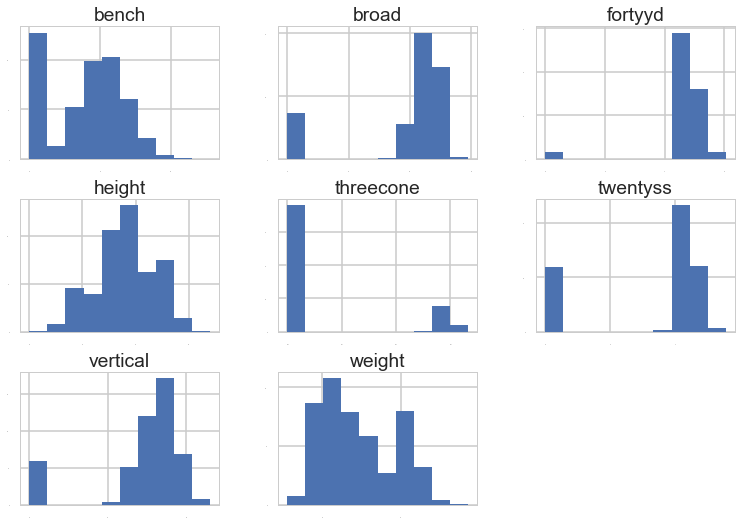

In [1751]:
attributes = df[['height', 'weight', 'fortyyd', 'twentyss', 'threecone', 'vertical', 'broad', 'bench']].copy()
# Looking at distributions for the player attributes. Looking for skewed data and may have to transform later.
attributes.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, layout=(3,3))

Let’s take a look at the same perspective of the data using density plots, since this is what our eyes are trying to do when looking at histograms. Becoming more clear that we need to standardize the player attributes, even height appear bimodal with the density plot.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000092DE6240>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000C0EA7BE0>]], dtype=object)

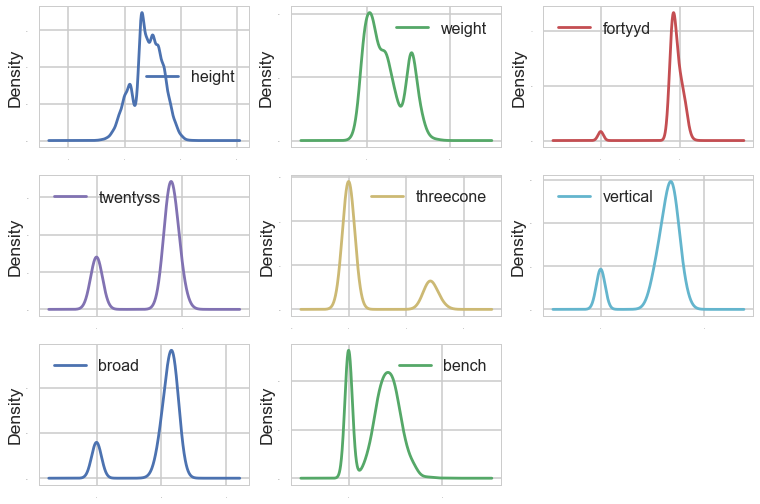

In [1752]:
# density
attributes.plot(kind='density', subplots=True, layout=(3,3), sharex=False, legend=True,
fontsize=1)

It is always good to look at box and whisker plots of numeric attributes to get an idea of the spread of values. Threecone had a ton of missing values, which explains why only a line is present at the zero mark (missing values = 0), another huge reason to standardize the attributes. We can see that attributes do have quite different spreads.

height          AxesSubplot(0.125,0.657941;0.227941x0.222059)
weight       AxesSubplot(0.398529,0.657941;0.227941x0.222059)
fortyyd      AxesSubplot(0.672059,0.657941;0.227941x0.222059)
twentyss        AxesSubplot(0.125,0.391471;0.227941x0.222059)
threecone    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
vertical     AxesSubplot(0.672059,0.391471;0.227941x0.222059)
broad              AxesSubplot(0.125,0.125;0.227941x0.222059)
bench           AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

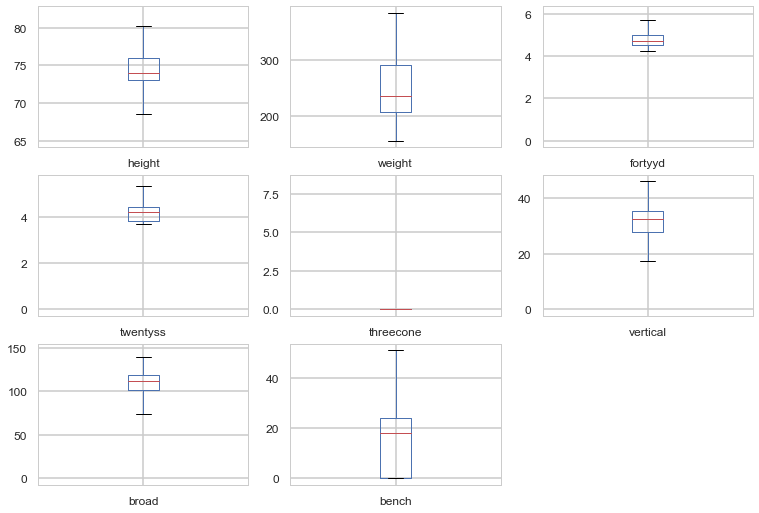

In [1753]:
# box and whisker plots
attributes.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False,
fontsize=12)

Makes sense that height and weight are positively correlated. Also makes sense that the broad jump and vertical jump are positively correlated, since they are both similar jumping drills.

Text(0.5,1,u'Attribute Correlation Matrix')

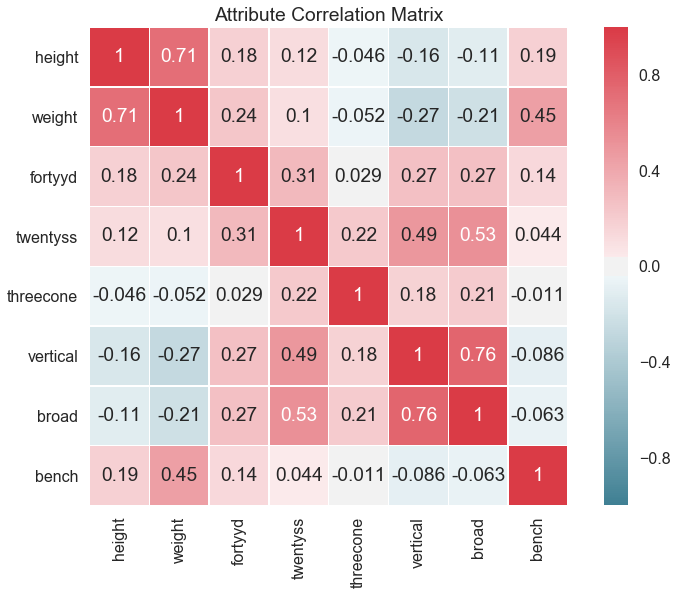

In [1754]:
# correlation matrix
f, ax = plt.subplots()
corr = attributes.corr()
sns.heatmap(corr, linewidths=0.5, annot=True, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title('Attribute Correlation Matrix')

# Validation Dataset

As we see our data is comprised of attributes with varying scales, therefore our dataset could benefit from rescaling the attributes so all are on the same scale. The attributes will be rescaled between the range of 0 and 1

In [1802]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
array = df.values
# separate array into input and output components
X = array[:,0:21]
Y = array[:,21]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.235  0.216  0.76   0.71   0.817  0.924  0.884  0.471  0.     0.     0.
   0.     0.     0.     0.     0.     0.     1.     0.     0.     0.   ]
 [ 0.412  0.186  0.731  0.     0.     0.     0.     0.235  0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     1.   ]
 [ 0.412  0.286  0.755  0.737  0.854  0.848  0.823  0.373  0.     0.     0.
   0.     0.     0.     0.     0.     0.     1.     0.     0.     0.   ]
 [ 0.471  0.312  0.752  0.755  0.859  0.783  0.823  0.471  0.     0.     0.
   0.     0.     0.     1.     0.     0.     0.     0.     0.     0.   ]
 [ 0.176  0.108  0.732  0.732  0.799  0.739  0.823  0.255  0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     1.   ]]


Load more libraries

In [1803]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [1804]:
# Split-out rescaled validation dataset
array = rescaledX
X = array[:,0:21].astype(float)
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

# Evaluate Standardized Algorithms

Standardization is a useful technique to transform attributes that are not normally distributed, with differing means and standard deviations, to a standard normal distribution with a mean of 0 and a standard deviation of 1. 

Will check from 6 algorithms, which one has the highest accuracy. Support Vector Machine (SVM) wins.

ScaledLR: 0.644549 (0.022064)
ScaledLDA: 0.645325 (0.020161)
ScaledKNN: 0.636767 (0.014092)
ScaledCART: 0.605402 (0.022186)
ScaledNB: 0.596325 (0.014488)
ScaledSVM: 0.649213 (0.014292)


[Text(0,0,u'ScaledLR'),
 Text(0,0,u'ScaledLDA'),
 Text(0,0,u'ScaledKNN'),
 Text(0,0,u'ScaledCART'),
 Text(0,0,u'ScaledNB'),
 Text(0,0,u'ScaledSVM')]

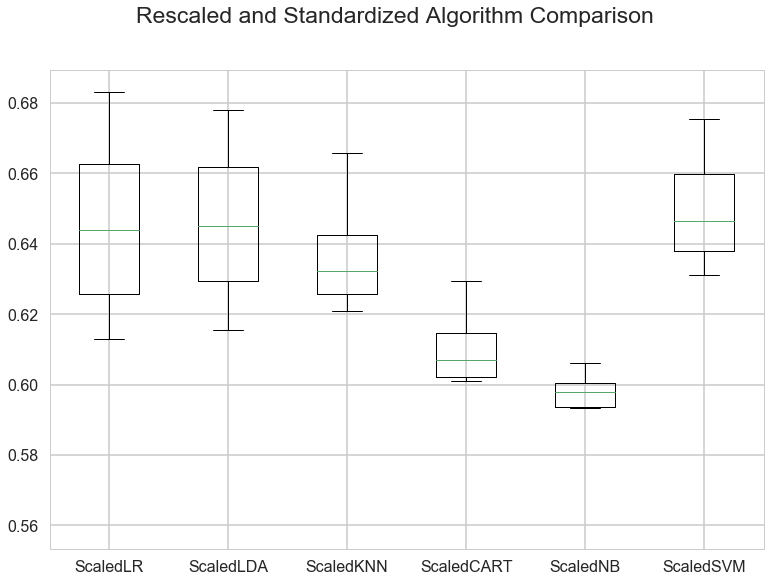

In [1805]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',
LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Rescaled and Standardized Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)

# Ensemble Methods

Gradient boosting classifier is the winner between the 6 algorithms and 4 ensembles with an accuracy of 69.54%. 2 out 4 ensembles beat out the best classification algorithm, SVM, as well. 

AB: 0.681355 (0.024261)
GBM: 0.694582 (0.023901)
RF: 0.636518 (0.024331)
ET: 0.632108 (0.031641)


[Text(0,0,u'AB'), Text(0,0,u'GBM'), Text(0,0,u'RF'), Text(0,0,u'ET')]

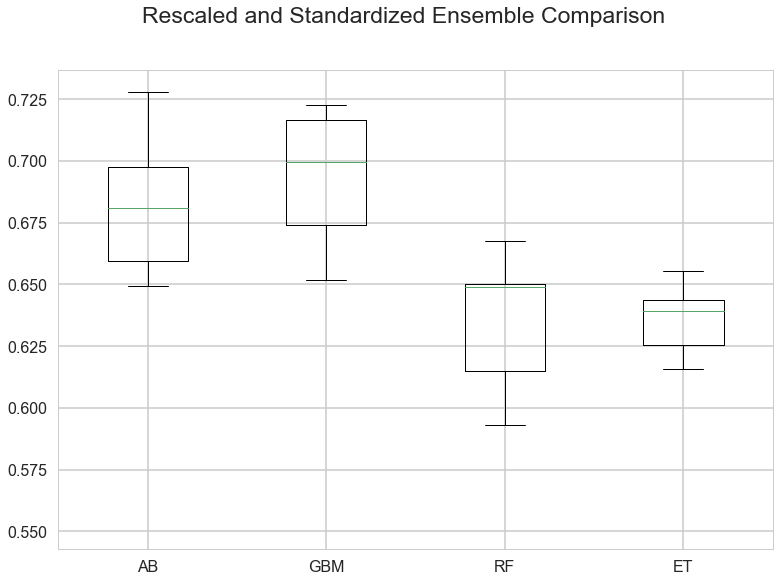

In [1806]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Rescaled and Standardized Ensemble Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)

# Test the model

The model is 71.19% accurate to classify if a player will or will not be drafted. The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.The model is more precise with drafted players and this may be due to having 3133 players in the dataset, compared to 1689 undrafted players, which is even smaller with the test set at 20% of the data. The model has an overall precision of 70% which doesn't seem too bad. 

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples. Recall was excellent for drafted players, not so great with undrafted players. Overall at 71% is pretty decent. It seems clear that the drafted players scores carry more weight to the overall scores, due to a much larger sample size.

The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is: F1 = 2 * (precision * recall) / (precision + recall). Pretty darn good for drafted players and not so hot with undrafted players. Overall at 69% is ok.

The support is the number of occurrences of each class in Y_validation.

Luckily our confusion matrix mainly consisted of true positives (574), with false positives (208) coming in a distant second, true negatives (113) third and lastly false negatives (70).

0.711917098446
[[113 208]
 [ 70 574]]
             precision    recall  f1-score   support

        0.0       0.62      0.35      0.45       321
        1.0       0.73      0.89      0.81       644

avg / total       0.70      0.71      0.69       965



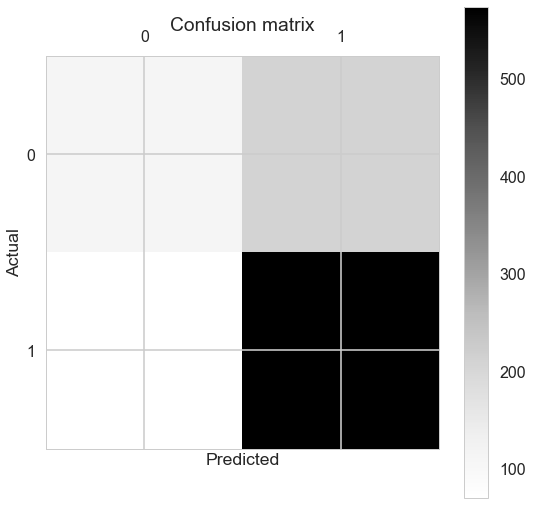

In [1807]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingClassifier()
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
confusion_matrix = confusion_matrix(Y_validation, predictions)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
print(classification_report(Y_validation, predictions))

Oh boy, the AUC score is not very good. .54 is not much better than flipping a coin to predict if a player will be drafted or not. 